<a href="https://colab.research.google.com/github/purvamasurkar/Python-Project/blob/main/AirlineDelay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airline Delay Analysis and Prediction**

We are using "Airline On-Time Performance Dataset" maintained by U.S. Department of
Transportation's Bureau of Transportation Statistics (BTS) for performing our data analysis and predictions for finding out the Airline delay.

Link:
https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr

This dataset provides flight scheduling, performance, delay factors, taxi times, duration, distance, cancellations, and diversions data. It enables analysis of flight frequencies, routes, patterns, delays, and ground operations efficiency. Stakeholders can identify common delay causes, evaluate airline and airport performance, and study the impact of cancellations and diversions. The insights obtained can help airlines, airports, and regulatory authorities make informed decisions to enhance the efficiency and performance of the air transportation system.

**We have considered data from June 2022 to Janurary 2023 ( approx. 7 Months of Data ) having 4534180 records and 110 columns**

*Installing Dependencies*

In [ ]:
pip install rarfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


*Libraries and packages were imported*

In [ ]:
# load packages into notebook
from os import path
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import rarfile

# display static image online
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [ ]:
from scipy import stats

# load packages into notebook [predictive]
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, mean_squared_error,r2_score, mean_absolute_error

*Dataset extraction and loading into dataframe*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rar_path = "/content/drive/MyDrive/dataset/combined.rar"
path.exists(rar_path)

True

In [ ]:
with rarfile.RarFile(rar_path) as rf:
   rf.extractall()

In [ ]:
data_path = "/content/combined.csv"
path.exists(data_path)

True

## **Data Understanding and Preparation**

Flight details such as scheduling, performance, and delay factors are included in the dataset. Exploration of the dataset will be required to identify patterns, missing values, and outliers. Preprocessing tasks such as filling missing values, encoding categorical variables, scaling numerical variables, and feature selection will be included in data preparation. These steps will aid in the transformation of raw data into a format suitable for building and evaluating machine learning models, allowing stakeholders to gain insights and make informed decisions to improve the efficiency and performance of air transportation.

Below are the few steps outlined that will be followed for Pre-Processing:
*   Removing redundant columns and preserving only key numeric columns
*   Converting and cleaning data where required
*   Converting and cleaning data where required
*   Dividing dataset and saving it for Exploratory data analysis

In [ ]:
df = pd.read_csv(data_path, encoding = "ISO-8859-1",
                 dtype=str, na_values=['na', '-', '.', '','?'],
                 date_parser=True)

In [ ]:
print(f'Shape:\n{df.shape}\n')
print(f'Dtypes:\n{df.dtypes}\n')
df.head(10)

Shape:
(4534180, 110)

Dtypes:
Year                object
Quarter             object
Month               object
DayofMonth          object
DayOfWeek           object
                     ...  
Div5TotalGTime      object
Div5LongestGTime    object
Div5WheelsOff       object
Div5TailNum         object
Unnamed: 109        object
Length: 110, dtype: object



,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2022,4,10,29,6,2022-10-29,UA,19977,UA,N463UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,4,10,29,6,2022-10-29,UA,19977,UA,N63890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,4,10,29,6,2022-10-29,UA,19977,UA,N27252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,4,10,29,6,2022-10-29,UA,19977,UA,N899UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022,4,10,29,6,2022-10-29,UA,19977,UA,N17753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022,4,10,29,6,2022-10-29,UA,19977,UA,N47275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022,4,10,29,6,2022-10-29,UA,19977,UA,N469UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2022,4,10,29,6,2022-10-29,UA,19977,UA,N496UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2022,4,10,29,6,2022-10-29,UA,19977,UA,N76503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022,4,10,29,6,2022-10-29,UA,19977,UA,N482UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*We create a list of columns  and create a Dataframe which have useful information for analysis and prediction.*

In [ ]:
col = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'Flight_Number_Reporting_Airline', 'Tail_Number', 'Origin', 'Dest', 'Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 'TaxiOut', 'DepartureDelayGroups', 'DepDelayMinutes', 'ArrTime', 'CRSArrTime', 'ArrDelay', 'TaxiIn', 'ArrivalDelayGroups', 'ArrDelayMinutes', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Cancelled', 'CancellationCode', 'Diverted']

In [ ]:
# dropping unnecessary columns as they would not be used for prediction
df = df[col]

# displaying first 5 rows
df.head()

,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
0,2022,10,29,6,2022-10-29,UA,309,N463UA,CMH,IAH,...,182.00,163.00,16.00,0.00,14.00,0.00,0.00,0.00,NaN,0.00
1,2022,10,29,6,2022-10-29,UA,308,N63890,KOA,LAX,...,298.00,277.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00
2,2022,10,29,6,2022-10-29,UA,307,N27252,SEA,EWR,...,317.00,282.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00
3,2022,10,29,6,2022-10-29,UA,306,N899UA,LAS,SFO,...,89.00,71.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00
4,2022,10,29,6,2022-10-29,UA,305,N17753,SAV,EWR,...,109.00,94.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00


*A function is created to show information on dataset ( This will be used recursively in the notebook )*

In [ ]:
def get_df_info(df):
  # show dataframe information summary

  # show the number of rows and columns for  dataset
  print('Dataframe dimensions:', df.shape)

  # the code below gives some information on columns types and number of null values
  df_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
  df_info=df_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values:'}))
  df_info=df_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'null values (%)'}))
  df_info
  return df_info

In [ ]:
get_df_info(df)

Dataframe dimensions: (4534180, 35)


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
column type,object,object,object,object,object,object,object,object,object,object,...,object,object,object,object,object,object,object,object,object,object
null values:,0,0,0,0,0,0,0,18428,0,0,...,114421,114421,3590604,3590604,3590604,3590604,3590604,0,4430753,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.406424,0.0,0.0,...,2.523521,2.523521,79.18971,79.18971,79.18971,79.18971,79.18971,0.0,97.718948,0.0


In [ ]:
# display simple statistics
df.describe(include='all')

,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
count,4534180,4534180,4534180,4534180,4534180,4534180,4534180,4515752,4534180,4534180,...,4419759,4419759,943576,943576,943576,943576,943576,4534180,103427,4534180
unique,3,9,32,8,246,18,6652,5864,369,370,...,709,675,1482,977,704,214,1146,3,5,3
top,2022,7,23,5,2022-07-21,WN,418,N492HA,ATL,ATL,...,80.00,63.00,0.00,0.00,0.00,0.00,0.00,0.00,B,0.00
freq,3995336,594957,151290,673276,20052,916500,2171,2158,215272,215257,...,36168,39404,378094,888612,515888,938724,473448,4430753,51207,4523173


In [ ]:
# the the content before applying the function
df[['CRSDepTime', 'DepTime', 'CRSArrTime', 'ArrTime']]

,CRSDepTime,DepTime,CRSArrTime,ArrTime
0,0640,0656,0828,0858
1,2150,2139,0603,0537
2,0747,0742,1609,1559
3,1913,1906,2050,2035
4,0620,0613,0825,0802
...,...,...,...,...
4534175,0825,0836,1001,1007
4534176,0745,0752,0923,0939
4534177,1400,1504,1802,1856
4534178,1905,NaN,2159,NaN


*We have created a function to validate data to integer and then to string. This will help us convert 24hr (HHMM) time into 12hr format (HH:MM AM/PM).*

In [ ]:
def validate_int2str(col):
    '''
    validate data to int and then to str
    parameter : float , int string number
    col : string text
    return : string type in readable time format
    '''
    try:
        if col:
            col = int(float(col))
            if (col):
                col = str(col).zfill(4)
                col = datetime.strptime(col, '%H%M').time().strftime("%I:%M %p")
            return col
        else:
            return np.NaN
    except Exception as e:
        return np.NaN

In [ ]:
# This code applies a lambda function called validate_int2str() to four different columns (CRSDepTime, DepTime, CRSArrTime, and ArrTime) of a Pandas DataFrame df,
#converting their values to a specific string format, and assigns the transformed values back to their respective columns in the DataFrame.
df['CRSDepTime'] = df['CRSDepTime'].apply(lambda x: validate_int2str(x))
df['DepTime'] = df['DepTime'].apply(lambda x: validate_int2str(x))
df['CRSArrTime'] = df.CRSArrTime.apply(lambda x: validate_int2str(x))
df['ArrTime'] = df.ArrTime.apply(lambda x: validate_int2str(x))

In [ ]:
# verify the result after applying the function
df[['CRSDepTime', 'DepTime', 'CRSArrTime', 'ArrTime']]

,CRSDepTime,DepTime,CRSArrTime,ArrTime
0,06:40 AM,06:56 AM,08:28 AM,08:58 AM
1,09:50 PM,09:39 PM,06:03 AM,05:37 AM
2,07:47 AM,07:42 AM,04:09 PM,03:59 PM
3,07:13 PM,07:06 PM,08:50 PM,08:35 PM
4,06:20 AM,06:13 AM,08:25 AM,08:02 AM
...,...,...,...,...
4534175,08:25 AM,08:36 AM,10:01 AM,10:07 AM
4534176,07:45 AM,07:52 AM,09:23 AM,09:39 AM
4534177,02:00 PM,03:04 PM,06:02 PM,06:56 PM
4534178,07:05 PM,NaN,09:59 PM,NaN


**We are creating different dataframes based on different flight status being observed in the current dataset**

1.   Cancelled Flights (Cancelled == 1)
2.   Diverted Flights (Diverted == 1)
1.   Delayed Flights (ArrivalDelayGroups >= 1)
2.   On Time Flights (ArrivalDelayGroups == 0)
3.   Early Flights (ArrivalDelayGroups < 0)






In [ ]:
print(df['Cancelled'].unique())


['0.00' '1.00' 'Cancelled']


In [ ]:
# Replace 'Cancelled' with the appropriate numeric value (e.g., '1' or '0')
df['Cancelled'] = df['Cancelled'].replace('Cancelled', '1') # Or use '0' if it represents no cancellation

In [ ]:
# convert column from string to int
df['Cancelled'] = df['Cancelled'].astype(float).astype(int)

# **Cancelled Dataframe**

In [ ]:
# filter cancelled flight data
df_cancelled = df[df.Cancelled == 1]

# removing cancelled flights from original dataframe
df = df[~(df.Cancelled == 1)]

# printing number of canceled flights
print("canceled flight count", df_cancelled.shape[0])

df_cancelled.head()

canceled flight count 103427


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
1568,2022,10,17,1,2022-10-17,UA,372,NaN,HNL,SFO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A,0.00
1773,2022,10,16,7,2022-10-16,UA,2632,NaN,EWR,SFO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A,0.00
2419,2022,10,16,7,2022-10-16,UA,1832,NaN,TUS,IAH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A,0.00
2509,2022,10,16,7,2022-10-16,UA,1734,NaN,LAX,IAH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A,0.00
2524,2022,10,16,7,2022-10-16,UA,1718,NaN,LAS,LAX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A,0.00


In [ ]:
# replace NaN cancellation code to UNKNOWN in the output
df_cancelled.CancellationCode.fillna(value='UNKNOWN', axis=0, inplace=True)

In [ ]:
get_df_info(df_cancelled)

Dataframe dimensions: (103427, 35)


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
column type,object,object,object,object,object,object,object,object,object,object,...,object,object,object,object,object,object,object,int64,object,object
null values:,0,0,0,0,0,0,0,18428,0,0,...,103420,103420,103420,103420,103420,103420,103420,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.817398,0.0,0.0,...,99.993232,99.993232,99.993232,99.993232,99.993232,99.993232,99.993232,0.0,0.0,0.0


In [ ]:
# converting column from string to int
df['Diverted'] = df['Diverted'].astype(float).astype(int)

# **Diverted Dataframe**

In [ ]:
# filter filght data
df_diverted = df[df.Diverted == 1]

# This code is filtering out (removing) rows from a Pandas DataFrame df where the value in the 'Diverted' column is equal to 1.
df = df[~(df.Diverted == 1)]

# print number of  flights
print("diverted flights count", df_diverted.shape[0])

df_diverted.head()

diverted flights count 11000


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
198,2022,10,28,5,2022-10-28,UA,2489,N39418,LAX,IAH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1
552,2022,10,28,5,2022-10-28,UA,2120,N23707,SMF,IAH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1
649,2022,10,28,5,2022-10-28,UA,2013,N57862,ORD,IAH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1
1488,2022,10,28,5,2022-10-28,UA,702,N13720,CLE,IAH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1
2544,2022,10,16,7,2022-10-16,UA,1693,N76269,PDX,ORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1


In [ ]:
get_df_info(df_diverted)

Dataframe dimensions: (11000, 35)


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
column type,object,object,object,object,object,object,object,object,object,object,...,object,object,object,object,object,object,object,int64,object,int64
null values:,0,0,0,0,0,0,0,0,0,0,...,11000,11000,11000,11000,11000,11000,11000,0,11000,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,0.0


**Diveretd and Cancelled are dropped from Normal flights dataframe**

### **Normal Flights Spearated dataframe**

In [ ]:
col_flights = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'Flight_Number_Reporting_Airline', 'Tail_Number', 'Origin', 'Dest', 'Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 'TaxiOut', 'DepartureDelayGroups', 'DepDelayMinutes', 'ArrTime', 'CRSArrTime', 'ArrDelay', 'TaxiIn', 'ArrivalDelayGroups', 'ArrDelayMinutes', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

In [ ]:
get_df_info(df)

Dataframe dimensions: (4419753, 35)


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
column type,object,object,object,object,object,object,object,object,object,object,...,object,object,object,object,object,object,object,int64,object,int64
null values:,0,0,0,0,0,0,0,0,0,0,...,1,1,3476184,3476184,3476184,3476184,3476184,0,4419753,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000023,0.000023,78.651092,78.651092,78.651092,78.651092,78.651092,0.0,100.0,0.0


In [ ]:
# replace empty cell with 0's
df.fillna(value=0, axis=0, inplace=True)

In [ ]:
get_df_info(df)

Dataframe dimensions: (4419753, 35)


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
column type,object,object,object,object,object,object,object,object,object,object,...,object,object,object,object,object,object,object,int64,int64,int64
null values:,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_flights = df[col_flights]
df_flights.dtypes

Year                               object
Month                              object
DayofMonth                         object
DayOfWeek                          object
FlightDate                         object
Reporting_Airline                  object
Flight_Number_Reporting_Airline    object
Tail_Number                        object
Origin                             object
Dest                               object
Distance                           object
DistanceGroup                      object
DepTime                            object
CRSDepTime                         object
DepDelay                           object
TaxiOut                            object
DepartureDelayGroups               object
DepDelayMinutes                    object
ArrTime                            object
CRSArrTime                         object
ArrDelay                           object
TaxiIn                             object
ArrivalDelayGroups                 object
ArrDelayMinutes                   

In [ ]:
df['Distance'] = df['Distance'].astype(float).astype(int)
df['DistanceGroup'] = df['DistanceGroup'].astype(float).astype(int)
df['DepDelay'] = df['DepDelay'].astype(float).astype(int)
df['TaxiOut'] = df['TaxiOut'].astype(float).astype(int)
df['DepartureDelayGroups'] = df['DepartureDelayGroups'].astype(float).astype(int)
df['DepDelayMinutes'] = df['DepDelayMinutes'].astype(float).astype(int)
df['ArrDelay'] = df['ArrDelay'].astype(float).astype(int)
df['TaxiIn'] = df['TaxiIn'].astype(float).astype(int)
df['ArrivalDelayGroups'] = df['ArrivalDelayGroups'].astype(float).astype(int)
df['ArrDelayMinutes'] = df['ArrDelayMinutes'].astype(float).astype(int)
df['CRSElapsedTime'] = df['CRSElapsedTime'].astype(float).astype(int)
df['ActualElapsedTime'] = df['ActualElapsedTime'].astype(float).astype(int)
df['AirTime'] = df['AirTime'].astype(float).astype(int)
df['CarrierDelay'] = df['CarrierDelay'].astype(float).astype(int)
df['WeatherDelay'] = df['WeatherDelay'].astype(float).astype(int)
df['NASDelay'] = df['NASDelay'].astype(float).astype(int)
df['SecurityDelay'] = df['SecurityDelay'].astype(float).astype(int)
df['LateAircraftDelay'] = df['LateAircraftDelay'].astype(float).astype(int)

# **Delayed Flights Dataframe**

In [ ]:
#filtering a pandas DataFrame df to only keep rows where the ArrivalDelayGroups column is greater than or equal to 1.
#The resulting filtered DataFrame is stored in a new variable called df_delayed.

df_delayed = df[df.ArrivalDelayGroups >= 1]
print("delayed flights count", df_delayed.shape[0])
df_delayed.head()

delayed flights count 943569


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
0,2022,10,29,6,2022-10-29,UA,309,N463UA,CMH,IAH,...,182,163,16,0,14,0,0,0,0,0
24,2022,10,29,6,2022-10-29,UA,283,N1902U,ATL,IAH,...,148,110,0,0,19,0,0,0,0,0
32,2022,10,29,6,2022-10-29,UA,273,N830UA,COS,ORD,...,148,121,25,0,0,0,0,0,0,0
75,2022,10,29,6,2022-10-29,UA,217,N464UA,SFO,PDX,...,104,84,1,0,0,0,134,0,0,0
82,2022,10,29,6,2022-10-29,UA,211,N437UA,ATL,SFO,...,297,274,8,0,0,0,9,0,0,0


# **On Time flights Dataframe**

In [ ]:
#This code is filtering a pandas DataFrame df to only keep rows where the ArrivalDelayGroups column equals 0, which means that the arrival of these flights was on time.
#The resulting filtered DataFrame is stored in a new variable called df_ontime.

df_ontime = df[df.ArrivalDelayGroups == 0]
print("ontime flights count =", df_ontime.shape[0])
df_ontime.head()

ontime flights count = 809141


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
5,2022,10,29,6,2022-10-29,UA,304,N47275,DTW,EWR,...,98,72,0,0,0,0,0,0,0,0
19,2022,10,29,6,2022-10-29,UA,289,N76269,EWR,RDU,...,95,70,0,0,0,0,0,0,0,0
21,2022,10,29,6,2022-10-29,UA,287,N27255,ATL,EWR,...,138,94,0,0,0,0,0,0,0,0
26,2022,10,29,6,2022-10-29,UA,281,N66848,SAT,IAH,...,89,36,0,0,0,0,0,0,0,0
28,2022,10,29,6,2022-10-29,UA,279,N73256,EWR,CLE,...,80,60,0,0,0,0,0,0,0,0


# **Early flights dataframe**

In [ ]:
#the code is essentially selecting all flights from the original DataFrame df that arrived early, i.e., with a negative arrival delay, and then printing the count of those flights and the first few rows of the resulting df_early DataFrame.
df_early = df[df.ArrivalDelayGroups < 0]
print("early flights count", df_ontime.shape[0])
df_early.head()

early flights count 809141


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
1,2022,10,29,6,2022-10-29,UA,308,N63890,KOA,LAX,...,298,277,0,0,0,0,0,0,0,0
2,2022,10,29,6,2022-10-29,UA,307,N27252,SEA,EWR,...,317,282,0,0,0,0,0,0,0,0
3,2022,10,29,6,2022-10-29,UA,306,N899UA,LAS,SFO,...,89,71,0,0,0,0,0,0,0,0
4,2022,10,29,6,2022-10-29,UA,305,N17753,SAV,EWR,...,109,94,0,0,0,0,0,0,0,0
6,2022,10,29,6,2022-10-29,UA,304,N469UA,EWR,PBI,...,163,141,0,0,0,0,0,0,0,0


## **Data Visualisation**

**Reporting airlines are flying within the united states**

We are plotting this graph using the column 'Reporting_Airline' which contains the airline codes.

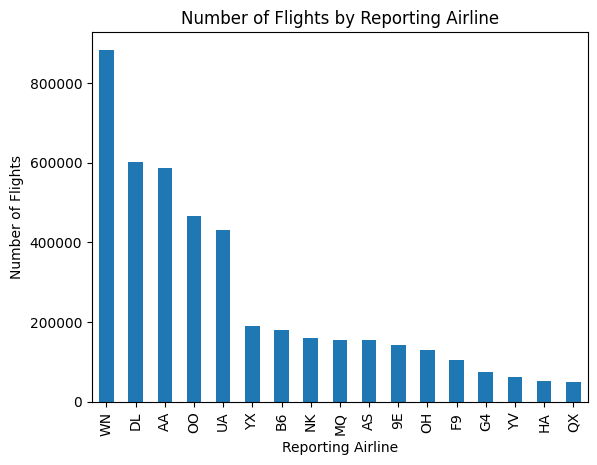

In [ ]:
# Total Number of flights flying through united states
df['Reporting_Airline'].value_counts().plot(kind='bar')
plt.title('Number of Flights by Reporting Airline')
plt.xlabel('Reporting Airline')
plt.ylabel('Number of Flights')
plt.show()

*We found that Caribbean Airlines Limited (WIN), Delta Airlines (DL) and American Airlines (AA) accounts for approx 50% of the flights being flown in last 7 months*

**Determining the status of the Flights**

We are creating following catagories based on the above dataframes which we have obtained to find the percentage of the status of the flight:


1.   Early Flights
2.   On Time Flights
3.   Late Flights
4.   Cancelled Flights
5.   Diverted Flights

In [ ]:
#This code is computing the percentage of flights in each of the five categories (early, on-time, late, cancelled, and diverted) based on the counts of those flights in five Pandas DataFrames (df_early, df_ontime, df_delayed, df_cancelled, and df_diverted) and assigning the resulting percentages to five variables (flights_early, flights_ontime, flights_late, flights_cancelled, and flights_diverted).
all_flights = df_early.shape[0] + df_ontime.shape[0] + df_delayed.shape[0] + df_cancelled.shape[0] + df_diverted.shape[0]
flights_early = round(df_early.shape[0]/all_flights, 2)*100
flights_ontime = round(df_ontime.shape[0]/all_flights, 2)*100
flights_late = round(df_delayed.shape[0]/all_flights, 2)*100
flights_cancelled = round(df_cancelled.shape[0]/all_flights, 2)*100
flights_diverted = round(df_diverted.shape[0]/all_flights, 2)*100

Y = [flights_early, flights_ontime, flights_late, flights_cancelled, flights_diverted]
Y

[59.0, 18.0, 21.0, 2.0, 0.0]

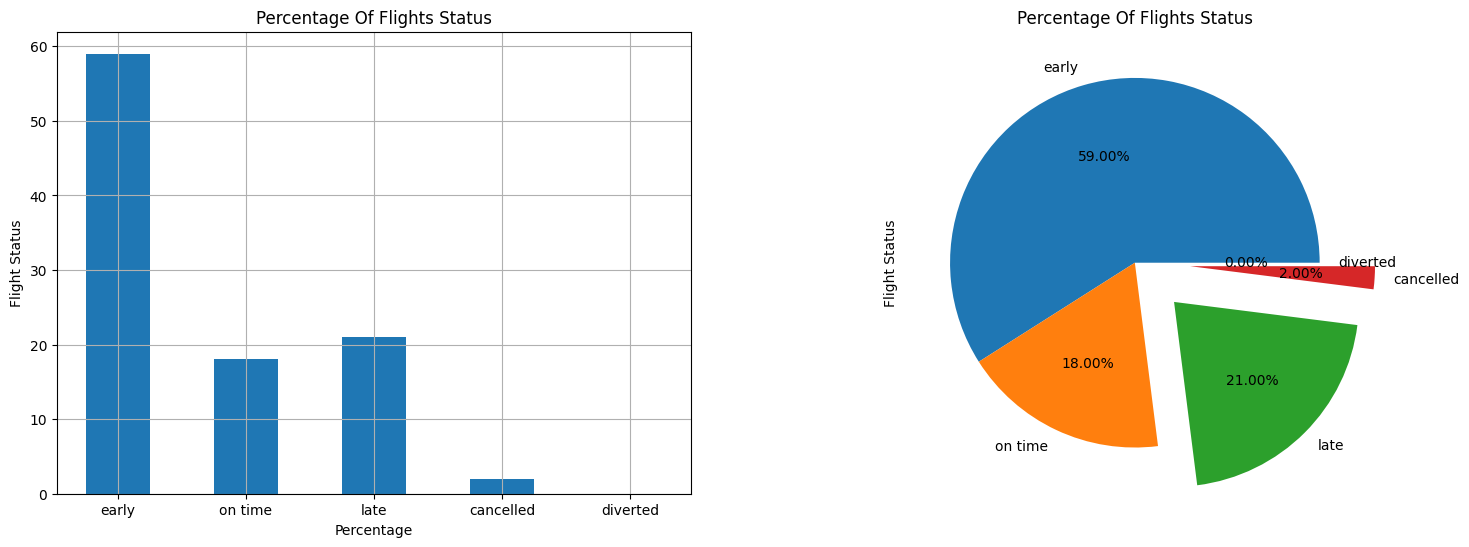

In [ ]:
# The code is creating a figure with two subplots, computing the percentage of flights in five categories,
#and defining two lists representing the categories and corresponding percentages, which will be used to create a bar chart and a pie chart to visualize the distribution of flights across the categories.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

X = ['early', 'on time', 'late', 'cancelled', 'diverted']
Y = [flights_early, flights_ontime, flights_late, flights_cancelled, flights_diverted]

# Bar plot on the first subplot (ax1)
ax1.bar(X, Y, width=0.5)
ax1.set_xlabel("Percentage")
ax1.set_ylabel("Flight Status")
ax1.set_title("Percentage Of Flights Status")
ax1.grid()

# Pie chart on the second subplot (ax2)
ax2.pie(Y, labels=X, explode=[0, 0, 0.3, 0.3, 0], autopct='%1.2f%%')
ax2.set_ylabel("Flight Status")
ax2.set_title("Percentage Of Flights Status")

# Display the figure
plt.show()

*We found that around 60% of the flights were early and 18% of the flights were on time. But we found that around 22% of the flights were late which is a significant loss in airline industry. Around 4% of the flights were also cancelled.*

**Overall trend of flight delays and cancellations over time**

We are trying to analyse the specific time period where higher delay for arrival and departure is found based on the data of following columns:

1.   Year
2.   Month
3.   DayofMonth
4.   DayOfWeek
5.   DepDelay
6.   ArrDelay
7.   Cancelled
8.   CancellationCode

In [ ]:
# Drop rows where the value in 'ColumnName' is equal to 'value_to_remove'
df_cancelled = df_cancelled.loc[df_cancelled['FlightDate'] != "FlightDate"]

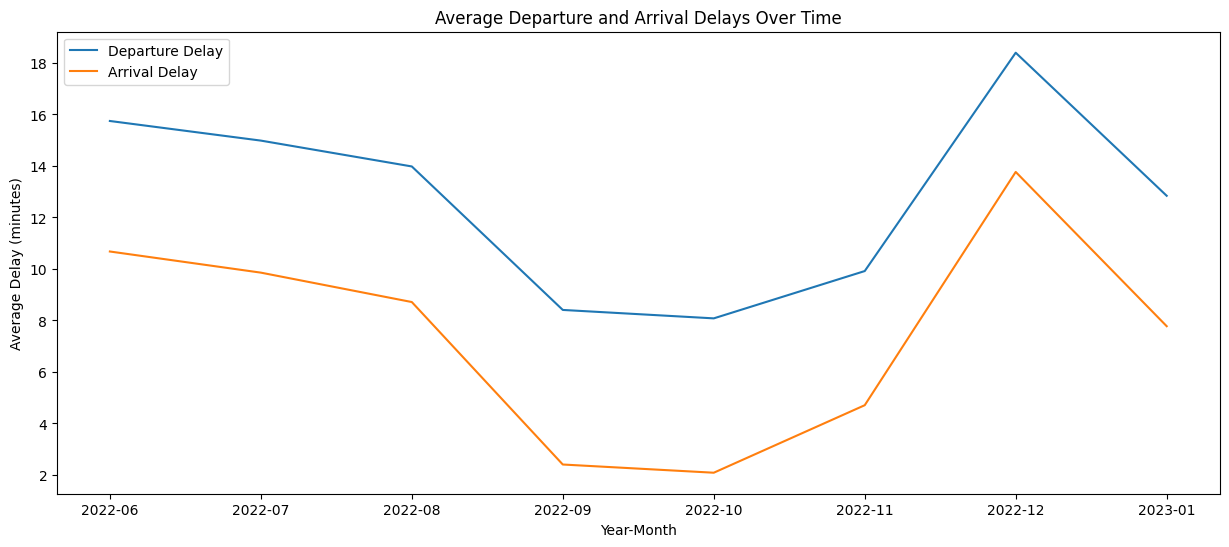

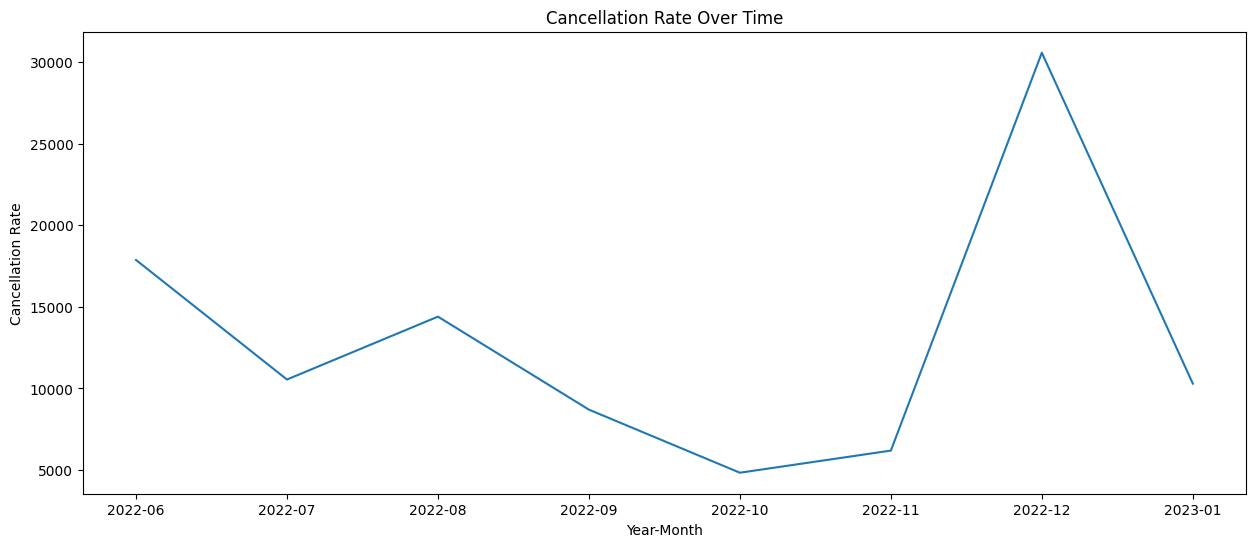

In [ ]:
# Convert FlightDate to datetime format
df['FlightDate'] = pd.to_datetime(df['FlightDate'], format='%Y-%m-%d')

# Create a new column to represent the year-month
df['YearMonth'] = df['FlightDate'].dt.to_period('M')

# Calculate the average departure and arrival delays per year-month
monthly_delays = df.groupby('YearMonth')[['DepDelay', 'ArrDelay']].mean().reset_index()
monthly_delays['YearMonth'] = monthly_delays['YearMonth'].astype(str)  # Convert YearMonth to string

# Plot the average departure and arrival delays per year-month
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_delays, x='YearMonth', y='DepDelay', label='Departure Delay')
sns.lineplot(data=monthly_delays, x='YearMonth', y='ArrDelay', label='Arrival Delay')
plt.title('Average Departure and Arrival Delays Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Delay (minutes)')
plt.legend()
plt.show()

# Convert FlightDate to datetime format
df_cancelled['FlightDate'] = pd.to_datetime(df_cancelled['FlightDate'], format='%Y-%m-%d')

# Create a new column to represent the year-month
df_cancelled['YearMonth'] = df_cancelled['FlightDate'].dt.to_period('M')

# Calculate the monthly cancellation rate
monthly_cancellations = df_cancelled.groupby('YearMonth')['Cancelled'].count().reset_index()
monthly_cancellations['YearMonth'] = monthly_cancellations['YearMonth'].astype(str)  # Convert YearMonth to string

# Plot the monthly cancellation rate
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_cancellations, x='YearMonth', y='Cancelled')
plt.title('Cancellation Rate Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Cancellation Rate')
plt.show()


*Above graphs shows the trend for Delays (Departure and Arrival) and Cancellation with respect to Months. It is being observed that December Month had the highest delays and cancellation.*

**Airlines with the highest and lowest average departure and arrival delays**

we are finding the highest and lowest average departure and arrival delays to see how they vary across different airlines using data of following columns



1.   Reporting_Airline
2.   DepDelay
3.   ArrDelay

Overall Delay Distribution found across all the airlines.

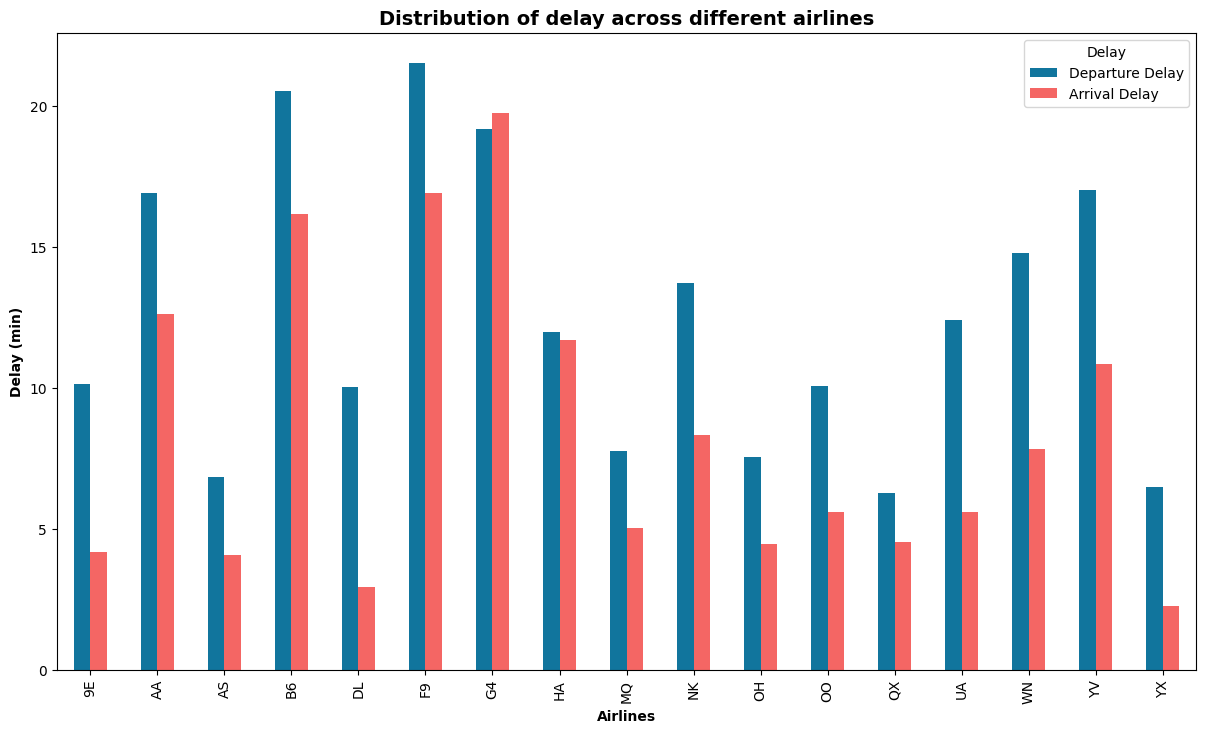

In [ ]:
# The code assigns the first two characters of each value in the 'Reporting_Airline' column of a DataFrame to the same column, and creates a list of two color values.
df['Reporting_Airline'] = df['Reporting_Airline'].apply(lambda x: x[:2])

colors = ['#11759D', '#F46664']

# The code groups the DataFrame by the 'Reporting_Airline' column, calculates the mean of 'DepDelay' and 'ArrDelay', and plots the result as a bar chart with specified color values and figure size.
df.groupby('Reporting_Airline')[['DepDelay','ArrDelay']].mean().plot.bar(
    figsize=[14.70, 8.27], color=colors)

# title, lables & legend
plt.title("Distribution of delay across different airlines", fontsize = 14, weight = "bold")
plt.ylabel('Delay (min)', fontsize = 10, weight = "bold")
plt.xlabel('Airlines', fontsize = 10, weight = "bold")

plt.legend(['Departure Delay', 'Arrival Delay'], title="Delay")
plt.show()

*From the above graph we find that Frontier Airlines (F9) and Jet Blue Airways (B6) which are low cost american airlines have been causing highest duration of delays with respect to other airlines*

**Departure and arrival delays between origin and destination airports:**

We are finding the whether there are any airports that experience consistently higher delays using data of the following columns.

1. Origin
2. Dest
3. DepDelay
4. ArrDelay

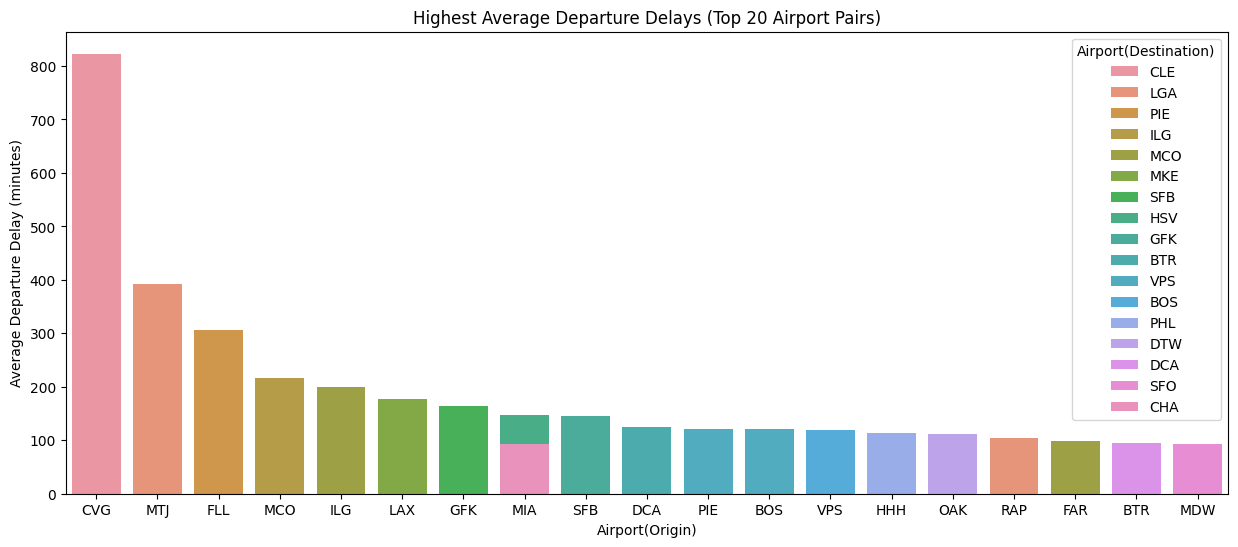

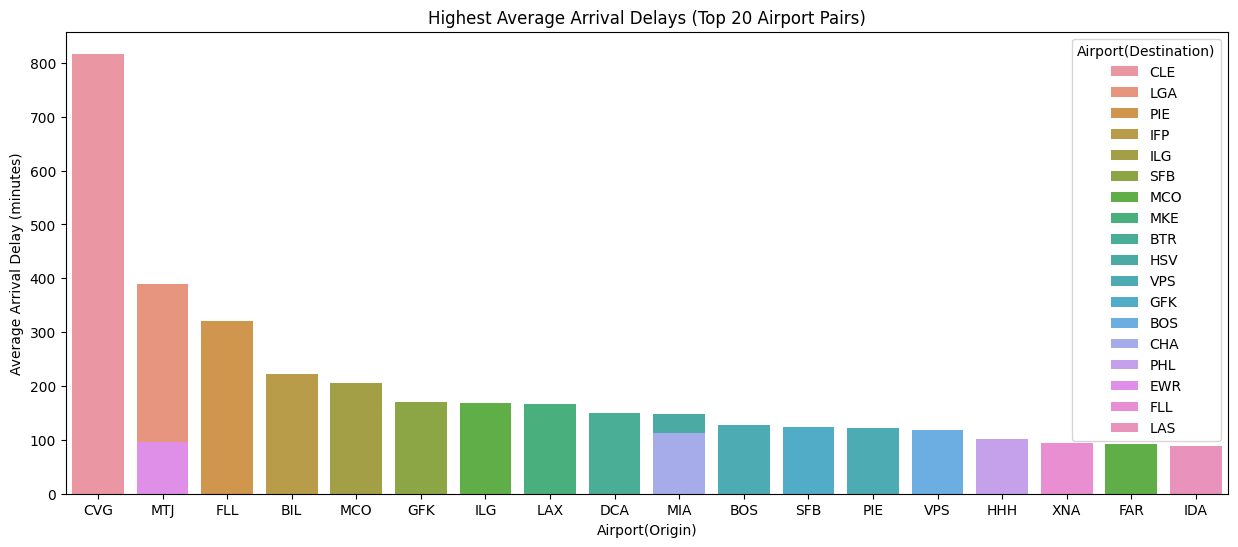

In [ ]:
# Calculate the average departure and arrival delays per airport pair
airport_delays = df.groupby(['Origin', 'Dest'])[['DepDelay', 'ArrDelay']].mean().reset_index()

# The code selects the top 20 airport pairs with the highest average departure delays, creates a bar plot using seaborn library, and adds title, axis labels, and legend to the plot.
dep_delays = airport_delays.sort_values('DepDelay', ascending=False).head(20)

plt.figure(figsize=(15, 6))
sns.barplot(data=dep_delays, x='Origin', y='DepDelay', hue='Dest', dodge=False)
plt.title('Highest Average Departure Delays (Top 20 Airport Pairs)')
plt.ylabel('Average Departure Delay (minutes)')
plt.xlabel('Airport(Origin)')
plt.legend(title='Airport(Destination)')
plt.show()

# Visualize the highest average arrival delays for top 20 airport pairs
arr_delays = airport_delays.sort_values('ArrDelay', ascending=False).head(20)

plt.figure(figsize=(15, 6))
sns.barplot(data=arr_delays, x='Origin', y='ArrDelay', hue='Dest', dodge=False)
plt.title('Highest Average Arrival Delays (Top 20 Airport Pairs)')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xlabel('Airport(Origin)')
plt.legend(title='Airport(Destination)')
plt.show()

*Cincinnati/Northern Kentucky International Airport has encountered highest average delay duration for arrival as well as departures*

**Patterns in the causes of delays**

We are finding the patterns in the causes of delays (e.g., carrier, weather, National Air System, security, or late aircraft) that contribute the most to overall flight delays using data of following columns:

1. CarrierDelay
2. WeatherDelay
3. NASDelay
4. SecurityDelay
5. LateAircraftDelay


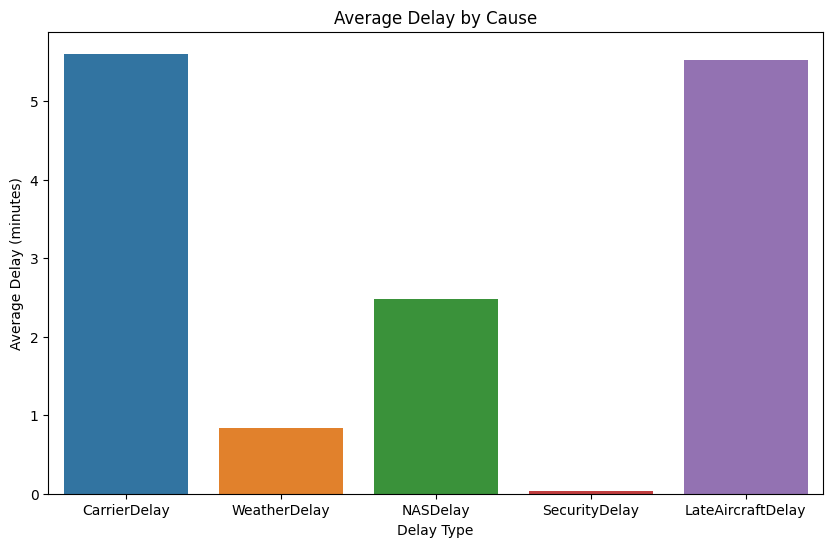

In [ ]:
# Calculate the average delay for each delay type
delay_types = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
delay_averages = df[delay_types].mean().reset_index()

# Rename columns for better visualization
delay_averages.columns = ['DelayType', 'AverageDelay']

# Visualize the average delay for each delay type
plt.figure(figsize=(10, 6))
sns.barplot(data=delay_averages, x='DelayType', y='AverageDelay')
plt.title('Average Delay by Cause')
plt.xlabel('Delay Type')
plt.ylabel('Average Delay (minutes)')
plt.show()


*We found that Carrier Delay and Late Aircraft delay has the highest delay average. This means that airlines needs to adpat to resolve or bring down this average delay that is being caused.*

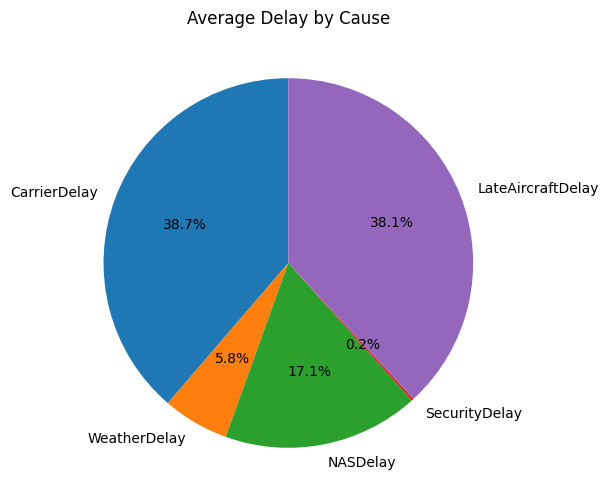

In [ ]:
# Calculate the average delay for each delay type
delay_types = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
delay_averages = df[delay_types].mean()

# Plot the pie chart
plt.figure(figsize=(10, 6))
delay_averages.plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.title('Average Delay by Cause')
plt.ylabel('')
plt.show()


*Carrier delay accounts for 38.7% where as Late Aircraft delay accounts for 38.1%. The total is more than 75% of the reasons that cause an aircraft to get delayed (Arrival as well as Departures).*

**Flight delays and cancellations by day of the week, month, or time of day**

We are finding flight delays and cancellations that vary by day of the week, month, or time of day and any peak hours or days where delay is more likely to occur using data of following fields

1. DayOfWeek
2. Month
3. DepTimeBlk
4. ArrTimeBlk
5. DepDelay
6. ArrDelay
7. Cancelled

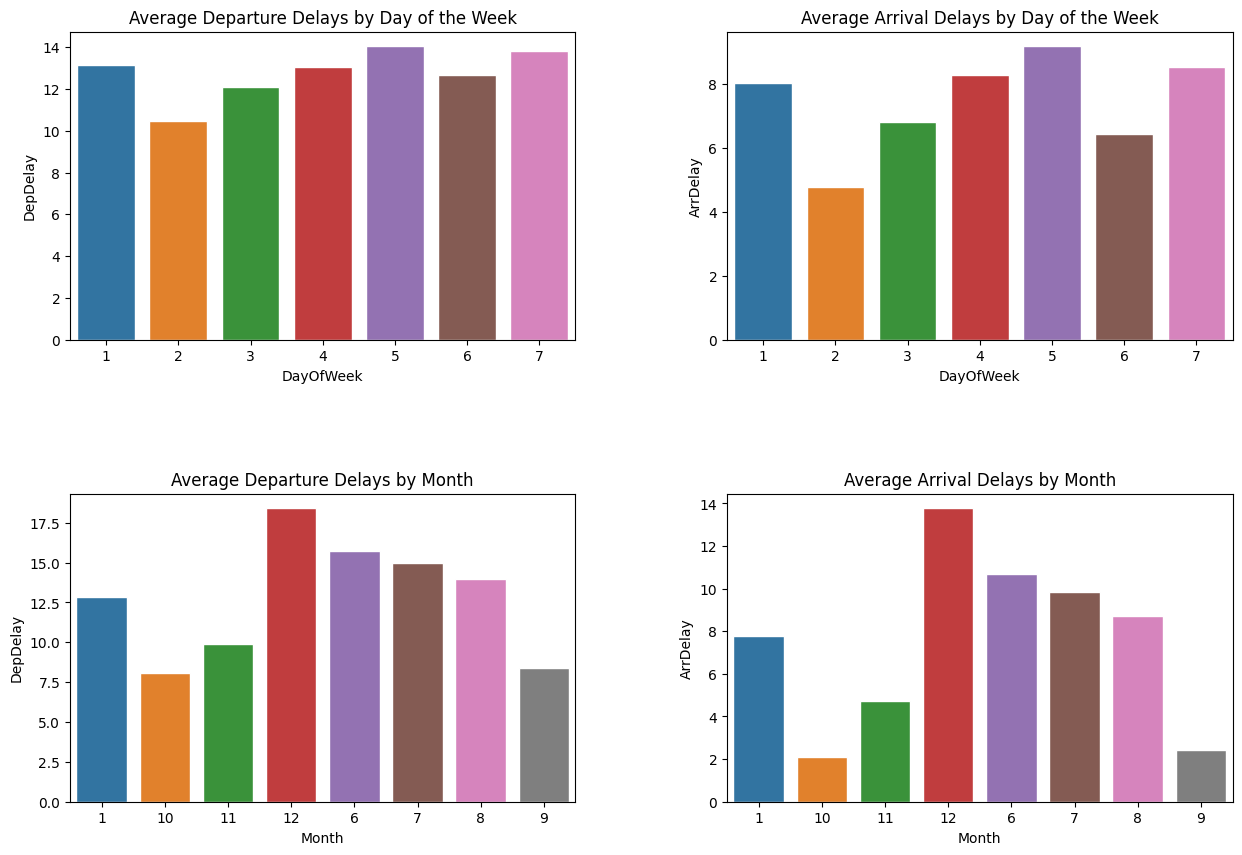

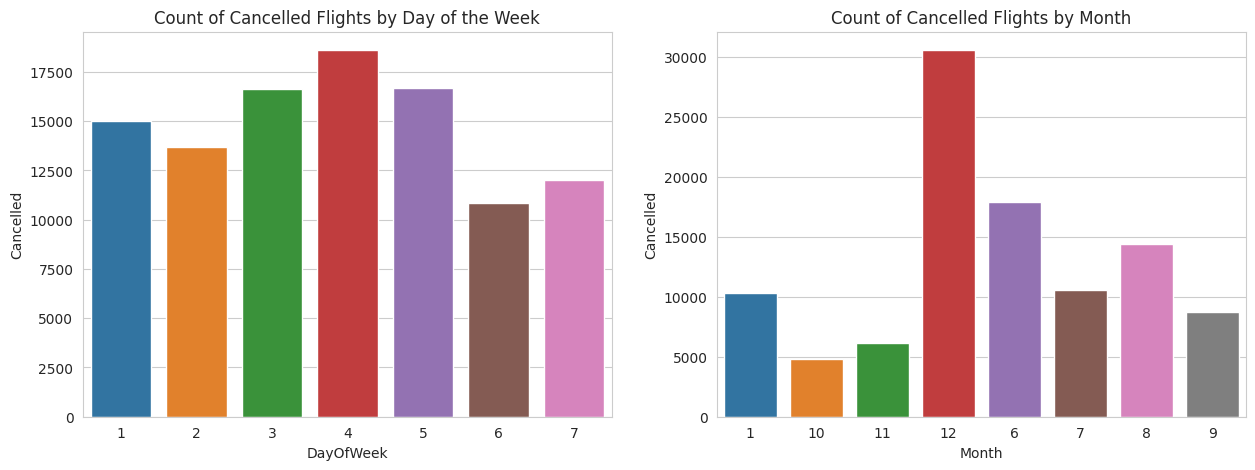

In [ ]:
# Calculate the average departure and arrival delays by day of the week
avg_delays_by_day = df.groupby('DayOfWeek')[['DepDelay', 'ArrDelay']].mean().reset_index()

# Calculate the average departure and arrival delays by month
avg_delays_by_month = df.groupby('Month')[['DepDelay', 'ArrDelay']].mean().reset_index()

# Calculate the count of cancelled flights by day of the week
cancelled_by_day_count = df_cancelled.groupby('DayOfWeek')['Cancelled'].count().reset_index()

# Calculate the count of cancelled flights by month
cancelled_by_month_count = df_cancelled.groupby('Month')['Cancelled'].count().reset_index()

# Set up the subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.set_style("whitegrid")

# Plot average delays by day of the week
sns.barplot(x='DayOfWeek', y='DepDelay', data=avg_delays_by_day, ax=axs[0, 0])
axs[0, 0].set_title('Average Departure Delays by Day of the Week')
sns.barplot(x='DayOfWeek', y='ArrDelay', data=avg_delays_by_day, ax=axs[0, 1])
axs[0, 1].set_title('Average Arrival Delays by Day of the Week')

# Plot average delays by month
sns.barplot(x='Month', y='DepDelay', data=avg_delays_by_month, ax=axs[1, 0])
axs[1, 0].set_title('Average Departure Delays by Month')
sns.barplot(x='Month', y='ArrDelay', data=avg_delays_by_month, ax=axs[1, 1])
axs[1, 1].set_title('Average Arrival Delays by Month')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

# Plot count of cancelled flights by day of the week and month
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x='DayOfWeek', y='Cancelled', data=cancelled_by_day_count, ax=axs[0])
axs[0].set_title('Count of Cancelled Flights by Day of the Week')
sns.barplot(x='Month', y='Cancelled', data=cancelled_by_month_count, ax=axs[1])
axs[1].set_title('Count of Cancelled Flights by Month')
plt.show()

*Delays by Week: It is being observed that Friday, followed by Monday and then Sunday has highest average delay. Whereas Tuesday, Wednesday, Thursday and Saturday have lower average delay.*

*Delays by Month: We found that December has the highest delay and October has the lowest delay average.*

*Cancellation by Week: Interestingly, Thursday accounts for highest number of cancellations as compared to other days of the week.*

*Cancellation by Month: December had the highest number of cancellations.*

*Conclusion: We found that the december month is the buisiest month where there are highest number of delays and cancellations*

**Relationship between flight distance and delay duration**

We are finding the relationship between flight distance and delay duration to analyse out of longer and shorter distance, which flights are more likely to be delayed using data of following columns:

1. Distance
2. DepDelay
3. ArrDelay


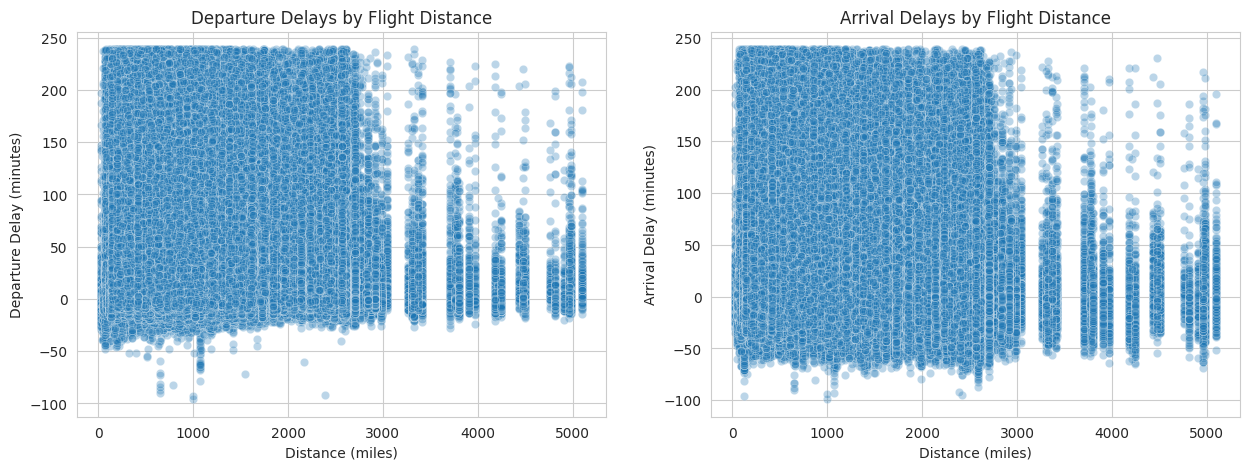

In [ ]:
# Filter out extreme delays to make the plot more readable
filtered_df = df[(df['DepDelay'] < 240) & (df['ArrDelay'] < 240)]

# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("whitegrid")

# Plot departure delays by flight distance
sns.scatterplot(x='Distance', y='DepDelay', data=filtered_df, ax=axs[0], alpha=0.3)
axs[0].set_title('Departure Delays by Flight Distance')
axs[0].set_xlabel('Distance (miles)')
axs[0].set_ylabel('Departure Delay (minutes)')

# Plot arrival delays by flight distance
sns.scatterplot(x='Distance', y='ArrDelay', data=filtered_df, ax=axs[1], alpha=0.3)
axs[1].set_title('Arrival Delays by Flight Distance')
axs[1].set_xlabel('Distance (miles)')
axs[1].set_ylabel('Arrival Delay (minutes)')

plt.show()

*From above scatter plot we observe that Shorter distance flights are having more delays as compared to long haul flights*

**Impact of diverted flights on overall delays and cancellations**

We are finding the impact of diverted flights on overall delays and cancellationsand whether certain airlines or airports more prone to diversions than others using data of following columns.

1. Reporting_Airline
2. Origin
3. Dest
4. Diverted.


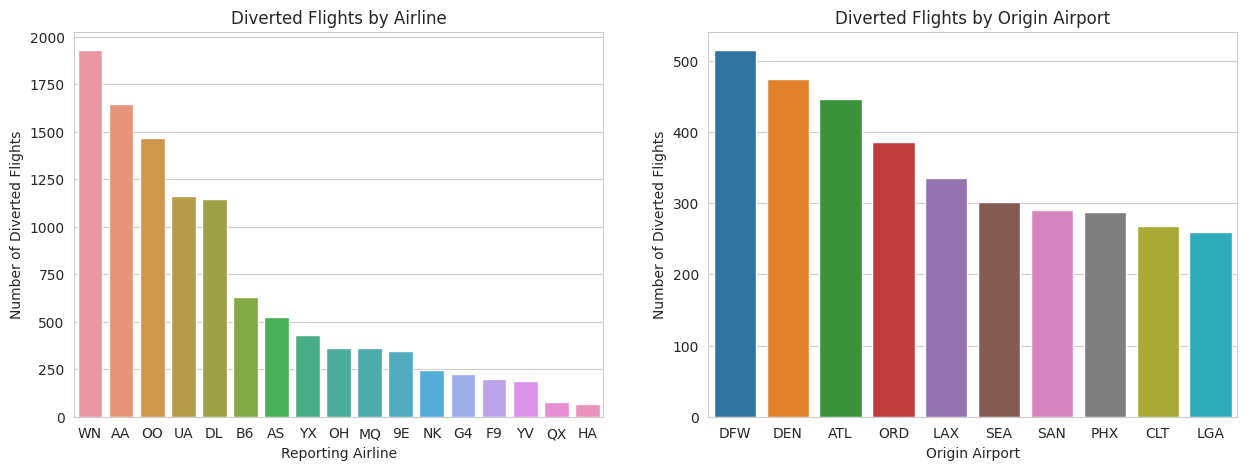

In [ ]:

# Calculate the number of diverted flights per airline and per origin airport
airline_diverted = df_diverted[df_diverted['Diverted'] == 1]['Reporting_Airline'].value_counts()
origin_diverted = df_diverted[df_diverted['Diverted'] == 1]['Origin'].value_counts().head(10)

# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("whitegrid")

# Plot diverted flights by airline
sns.barplot(x=airline_diverted.index, y=airline_diverted.values, ax=axs[0])
axs[0].set_title('Diverted Flights by Airline')
axs[0].set_xlabel('Reporting Airline')
axs[0].set_ylabel('Number of Diverted Flights')

# Plot diverted flights by origin airport
sns.barplot(x=origin_diverted.index, y=origin_diverted.values, ax=axs[1])
axs[1].set_title('Diverted Flights by Origin Airport')
axs[1].set_xlabel('Origin Airport')
axs[1].set_ylabel('Number of Diverted Flights')

plt.show()

*Caribbean Airlines Limited (WIN) and American Airline (AA) had the highest number of flight diversions*

*Dallas/Fort Worth International Airport (DFW) and Denver International Airport (DEN) had the highest number of flight diversions. Denver Airport is considered to the be the buisiest airport. But steps needs to be taken to mitigate the diversion issue.*

**Proportion of on-time flights across different airlines, airports, and time periods**

We are finding the proportion of on-time flights compare across different airlines, airports, and time periods using data of following columns.

1. Reporting_Airline
2. Origin
3. Dest
4. Year
4. Month
5. DayOfWeek
6. DepDelay
7. ArrDelay


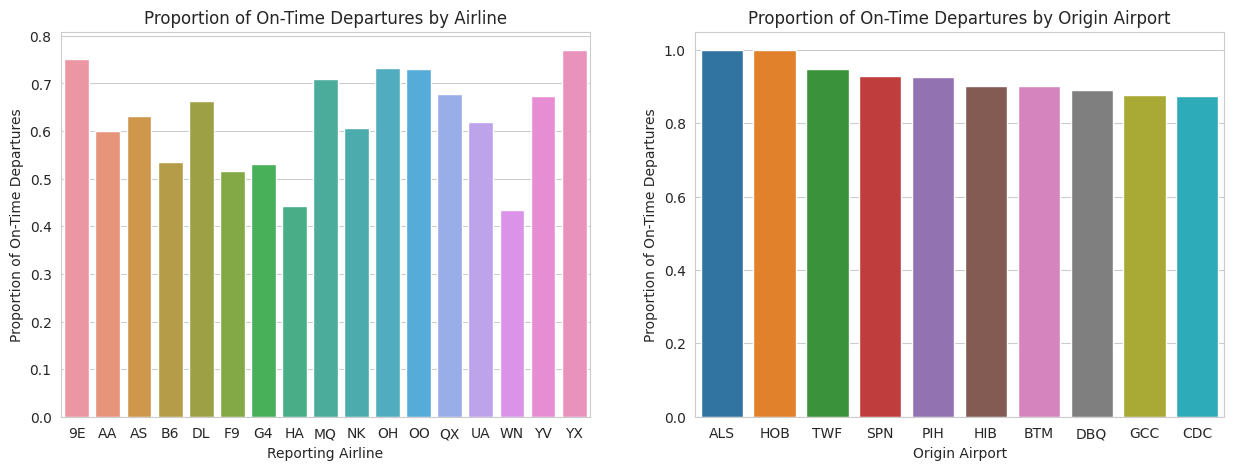

In [ ]:
# Define a function to determine if a flight is on-time
def is_on_time(delay):
    return 1 if delay <= 0 else 0

# Calculate on-time flights
df['OnTime_Dep'] = df['DepDelay'].apply(is_on_time)
df['OnTime_Arr'] = df['ArrDelay'].apply(is_on_time)

# Calculate the proportion of on-time flights by airline and origin airport
airline_ontime = df.groupby('Reporting_Airline')['OnTime_Dep'].mean()
origin_ontime = df.groupby('Origin')['OnTime_Dep'].mean().sort_values(ascending=False).head(10)

# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("whitegrid")

# Plot on-time flights by airline
sns.barplot(x=airline_ontime.index, y=airline_ontime.values, ax=axs[0])
axs[0].set_title('Proportion of On-Time Departures by Airline')
axs[0].set_xlabel('Reporting Airline')
axs[0].set_ylabel('Proportion of On-Time Departures')

# Plot on-time flights by origin airport
sns.barplot(x=origin_ontime.index, y=origin_ontime.values, ax=axs[1])
axs[1].set_title('Proportion of On-Time Departures by Origin Airport')
axs[1].set_xlabel('Origin Airport')
axs[1].set_ylabel('Proportion of On-Time Departures')

plt.show()

*ANS and HOB airports have all flights departed on time. Whereas in terms of airlines YX has the highest proportion on on time departures*

**Factors with the most significant impact on flight delays**

We are finding the factors (e.g., airline, origin and destination airports, time-related factors, or flight characteristics) that have the most significant impact on flight delays and whether these factors be used to predict flight delays or cancellations using data of following columns:

1. Reporting_Airline
2. Origin
3. Dest
4. DayOfWeek
5. Month
6. DepTimeBlk
7. ArrTimeBlk
8. Distance
9. DepDelay
10. ArrDelay
11. CarrierDelay
12. WeatherDelay
13. NASDelay
14. SecurityDelay
15. LateAircraftDelay


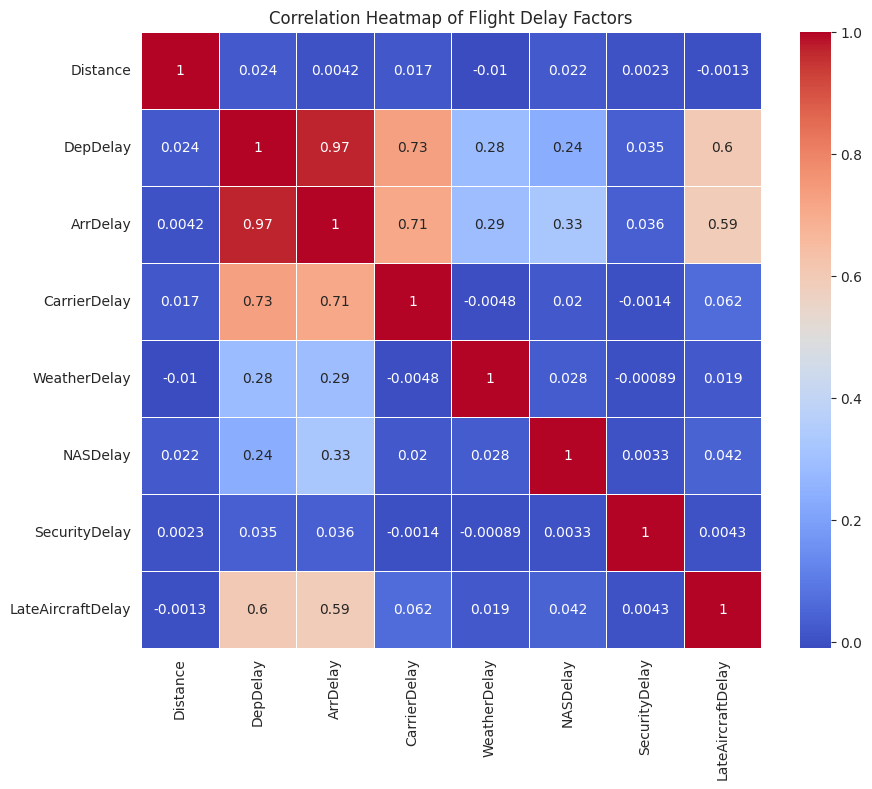

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average delay values by airline, origin, destination, and time-related factors
avg_delays = df.groupby(['Reporting_Airline', 'Origin', 'Dest', 'DayOfWeek', 'Month', 'DepTime', 'ArrTime', 'Distance']).agg({
    'DepDelay': 'mean',
    'ArrDelay': 'mean',
    'CarrierDelay': 'mean',
    'WeatherDelay': 'mean',
    'NASDelay': 'mean',
    'SecurityDelay': 'mean',
    'LateAircraftDelay': 'mean'
}).reset_index()

# Calculate the correlation matrix
corr_matrix = avg_delays.drop(['Reporting_Airline', 'Origin', 'Dest'], axis=1).corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Flight Delay Factors")
plt.show()


*From the above correlation matrix, it is found that Carrier delay and Late aircraft delay as strongly correlated with arrival delay and departure delay.Distance is loosely correlated factor.*

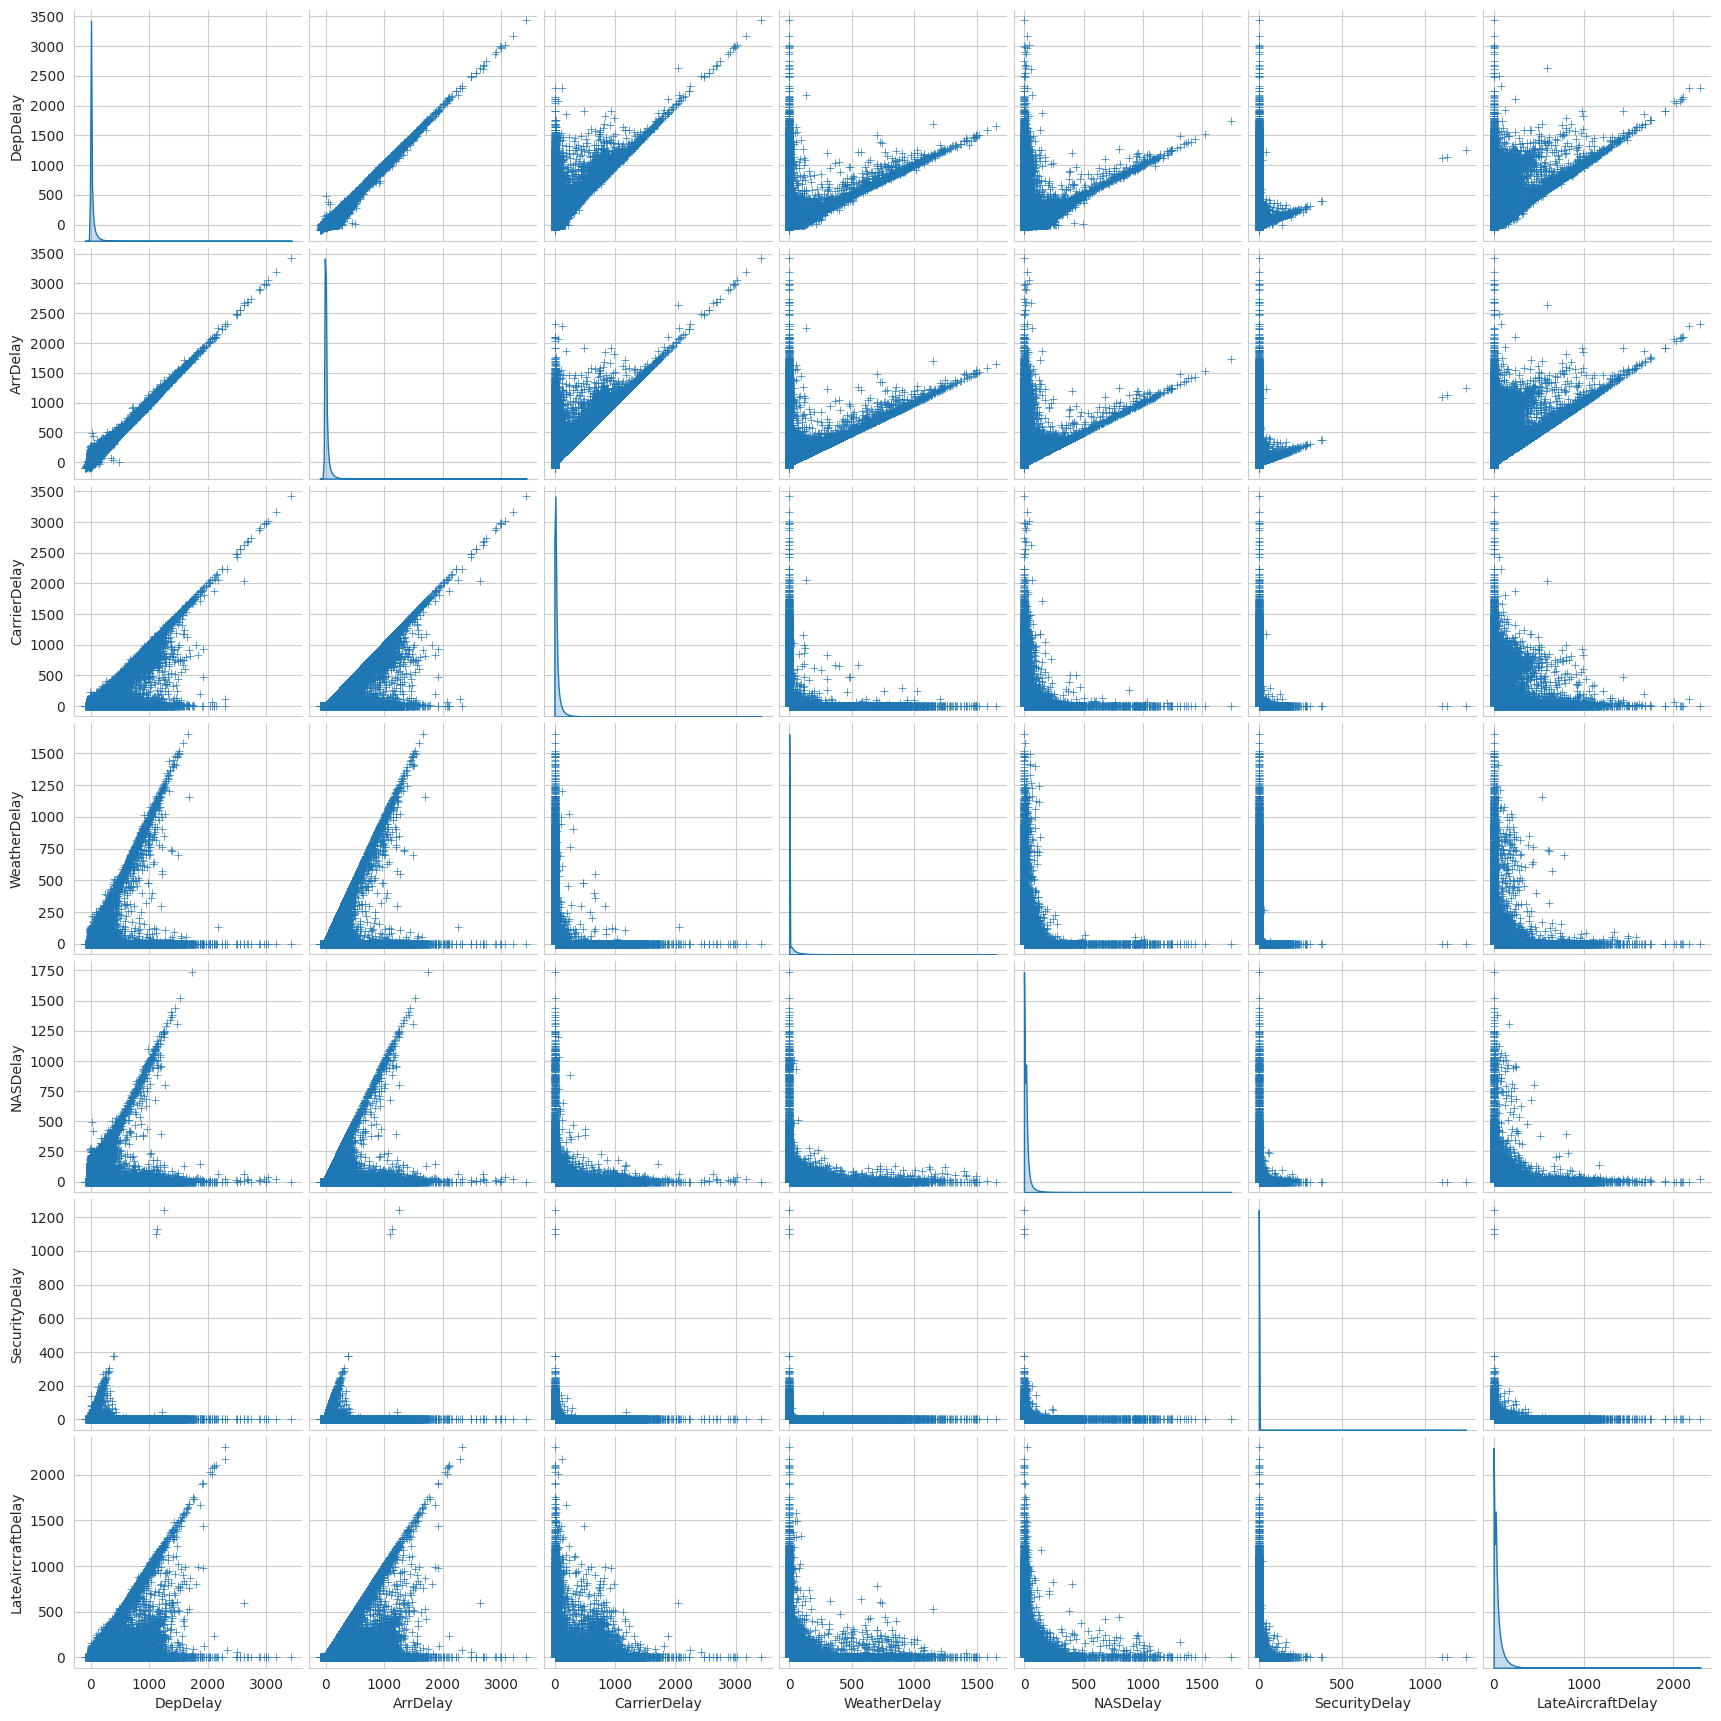

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average delay values by airline, origin, destination, and time-related factors
avg_delays = df.groupby(['Reporting_Airline', 'Origin', 'Dest', 'DayOfWeek', 'Month', 'DepTime', 'ArrTime', 'Distance']).agg({
    'DepDelay': 'mean',
    'ArrDelay': 'mean',
    'CarrierDelay': 'mean',
    'WeatherDelay': 'mean',
    'NASDelay': 'mean',
    'SecurityDelay': 'mean',
    'LateAircraftDelay': 'mean'
}).reset_index()

# Create a pair plot to visualize the relationships between different features and delays
selected_columns = ['DepDelay', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
sns.pairplot(avg_delays[selected_columns], diag_kind='kde', markers='+')
plt.show()

**Most common reasons for flight cancellations**

We are finding the most common reasons for flight cancellations and whether these reasons vary based on airline, airport, or time period using data of following columns:

1. Cancelled
2. CancellationCode
3. Reporting_Airline
4. Origin
5. Dest
6. Year
7. Month
8. DayOfWeek


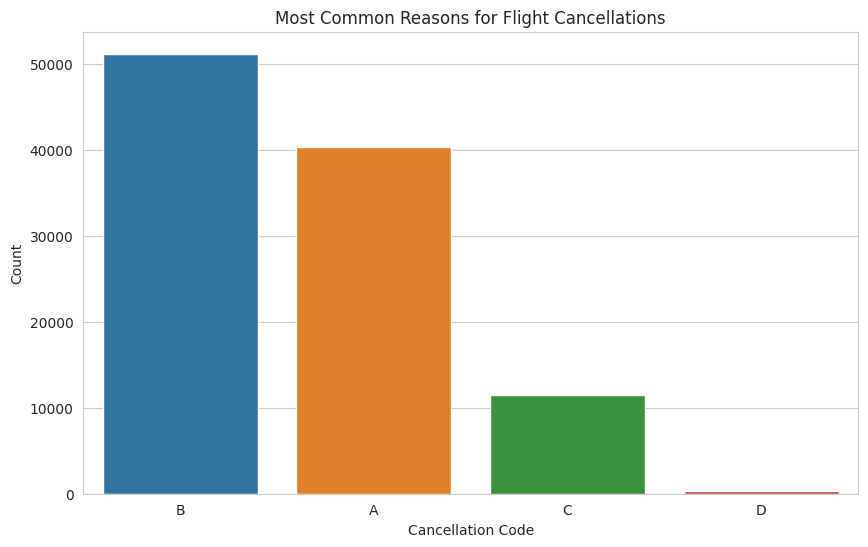

In [ ]:
# Filter the data for cancelled flights
cancelled_flights = df_cancelled[df_cancelled['Cancelled'] == 1]

# Count the occurrences of each cancellation code
cancellation_counts = cancelled_flights['CancellationCode'].value_counts()

# Bar plot for cancellation reasons
plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_counts.index, y=cancellation_counts.values)
plt.title('Most Common Reasons for Flight Cancellations')
plt.xlabel('Cancellation Code')
plt.ylabel('Count')
plt.show()


*Weather (Cancellation - B) has caused highest number of cancellations followed by Carrier (Cancellation - A). We can also see that there was some cancellation due to security reasons (Cancellation - D). Some delays were also caused by National Air System (NAS) (Cancellation -C).*

**Relationship between taxi-in, taxi-out times, and overall flight delays**

We are finding the relationship between taxi-in, taxi-out times, and overall flight delays and whether longer
taxi times associated with increased delays using data of following columns:

1. TaxiIn
2. TaxiOut
3. DepDelay
4. ArrDelay

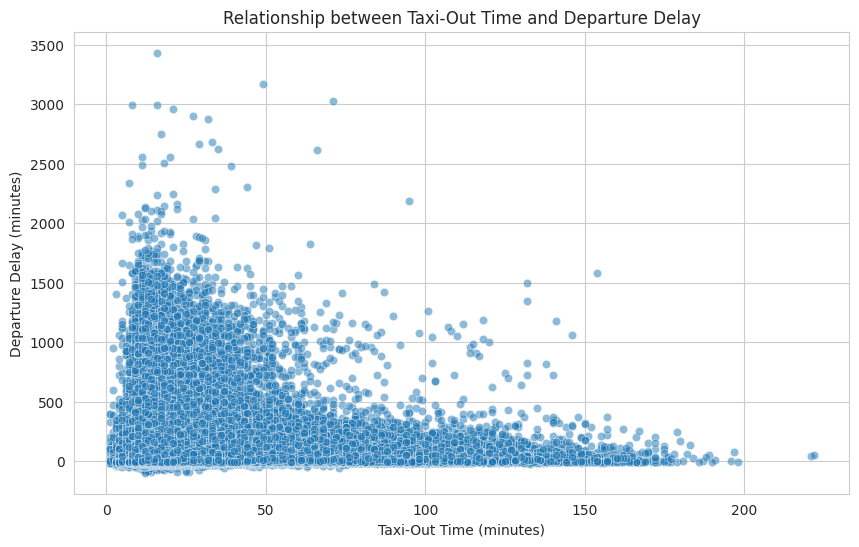

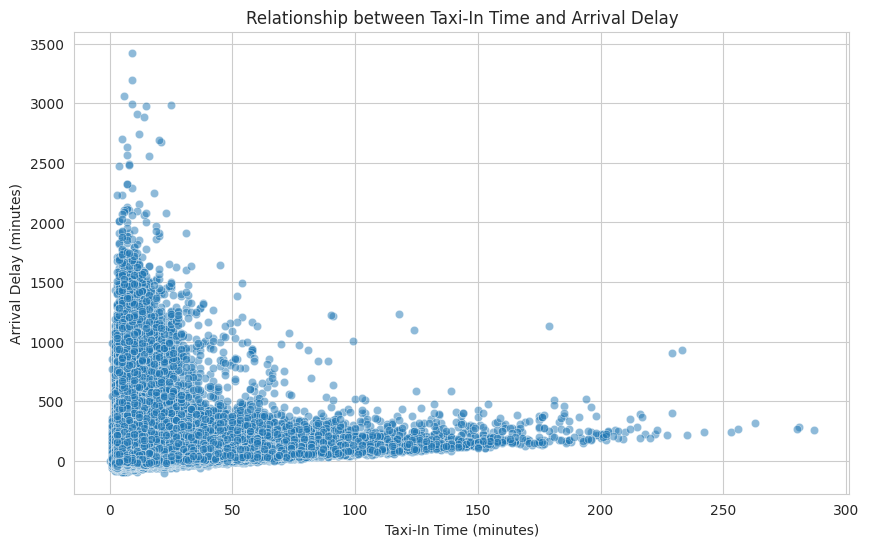

In [ ]:
# Scatter plot for taxi-out time and departure delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TaxiOut', y='DepDelay', data=df, alpha=0.5)
plt.title('Relationship between Taxi-Out Time and Departure Delay')
plt.xlabel('Taxi-Out Time (minutes)')
plt.ylabel('Departure Delay (minutes)')
plt.show()

# Scatter plot for taxi-in time and arrival delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TaxiIn', y='ArrDelay', data=df, alpha=0.5)
plt.title('Relationship between Taxi-In Time and Arrival Delay')
plt.xlabel('Taxi-In Time (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.show()


*From the above graphs we can see that airlines try to reduce the taxi-in and taxi-out times if the flights are significantly delayed to coverup the total elapsed flight time.*

# **Features selection for prediction**

In [ ]:
colPred = ['Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 'DepartureDelayGroups', 'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime', 'ArrDelay']

In [ ]:
arrDelay_df = df[colPred]
get_df_info(arrDelay_df)

Dataframe dimensions: (4419753, 13)


,Month,DayofMonth,DayOfWeek,Distance,DistanceGroup,DepTime,CRSDepTime,DepDelay,DepartureDelayGroups,DepDelayMinutes,CRSArrTime,CRSElapsedTime,ArrDelay
column type,object,object,object,int64,int64,object,object,int64,int64,int64,object,int64,int64
null values:,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Function written to remove leading 0 which will be used to convert Time fields (Object) into Float for prediction purpose.

In [ ]:
def remove_zero(col):
    col_str = str(col)
    if col_str[0] == '0':
        return col_str[1:]
    else:
        return col_str

Conversion of CRSDepTime from Time (Object) to Float

In [ ]:
#The code creates 'hours' and 'minutes' columns by converting a time column to datetime and extracting the hour and minute components, and then adds these columns to the 'CRSDepTime' column to create a new column with the time in hours and minutes.
arrDelay_df['hours'] = pd.to_datetime(arrDelay_df['CRSDepTime'].apply(lambda x: remove_zero(x))).dt.hour
arrDelay_df['minutes'] = pd.to_datetime(arrDelay_df['CRSDepTime'].apply(lambda x: remove_zero(x))).dt.minute/60
arrDelay_df['CRSDepTime'] = arrDelay_df['hours'] + arrDelay_df['minutes']
# we will drop some columns "not in our model"
arrDelay_df = arrDelay_df.drop(columns=['hours', 'minutes'])
get_df_info(arrDelay_df)

Dataframe dimensions: (4419753, 13)


,Month,DayofMonth,DayOfWeek,Distance,DistanceGroup,DepTime,CRSDepTime,DepDelay,DepartureDelayGroups,DepDelayMinutes,CRSArrTime,CRSElapsedTime,ArrDelay
column type,object,object,object,int64,int64,object,float64,int64,int64,int64,object,int64,int64
null values:,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Conversion of DepTime from Time (Object) to Float

In [ ]:
#The code creates 'hours' and 'minutes' columns by converting a time column to datetime and extracting the hour and minute components, and then adds these columns to the 'DepTime' column to create a new column with the time in hours and minutes.
arrDelay_df['hours'] = pd.to_datetime(arrDelay_df['DepTime'].apply(lambda x: remove_zero(x))).dt.hour
arrDelay_df['minutes'] = pd.to_datetime(arrDelay_df['DepTime'].apply(lambda x: remove_zero(x))).dt.minute/60
arrDelay_df['DepTime'] = arrDelay_df['hours'] + arrDelay_df['minutes']
# we will drop some columns "not in our model"
arrDelay_df = arrDelay_df.drop(columns=['hours', 'minutes'])
get_df_info(arrDelay_df)

Dataframe dimensions: (4419753, 13)


,Month,DayofMonth,DayOfWeek,Distance,DistanceGroup,DepTime,CRSDepTime,DepDelay,DepartureDelayGroups,DepDelayMinutes,CRSArrTime,CRSElapsedTime,ArrDelay
column type,object,object,object,int64,int64,float64,float64,int64,int64,int64,object,int64,int64
null values:,0,0,0,0,0,433,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.009797,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Conversion of CRSArrTime from Time (Object) to Float

In [ ]:
arrDelay_df['hours'] = pd.to_datetime(arrDelay_df['CRSArrTime'].apply(lambda x: remove_zero(x))).dt.hour
arrDelay_df['minutes'] = pd.to_datetime(arrDelay_df['CRSArrTime'].apply(lambda x: remove_zero(x))).dt.minute/60
arrDelay_df['CRSArrTime'] = arrDelay_df['hours'] + arrDelay_df['minutes']
# we will drop some columns "not in our model"
arrDelay_df = arrDelay_df.drop(columns=['hours', 'minutes'])
get_df_info(arrDelay_df)

Dataframe dimensions: (4419753, 13)


,Month,DayofMonth,DayOfWeek,Distance,DistanceGroup,DepTime,CRSDepTime,DepDelay,DepartureDelayGroups,DepDelayMinutes,CRSArrTime,CRSElapsedTime,ArrDelay
column type,object,object,object,int64,int64,float64,float64,int64,int64,int64,float64,int64,int64
null values:,0,0,0,0,0,433,0,0,0,0,5,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.009797,0.0,0.0,0.0,0.0,0.000113,0.0,0.0


Conversion of Month, DayofMonth and DayofWeek from Object datatype to int for prediction purpose

In [ ]:
#The code converts columns in a DataFrame from float to integer type and then calls a function 'get_df_info' to display information about the DataFrame.
arrDelay_df['Month'] = arrDelay_df['Month'].astype(float).astype(int)
arrDelay_df['DayofMonth'] = arrDelay_df['DayofMonth'].astype(float).astype(int)
arrDelay_df['DayOfWeek'] = arrDelay_df['DayOfWeek'].astype(float).astype(int)
get_df_info(arrDelay_df)

Dataframe dimensions: (4419753, 13)


,Month,DayofMonth,DayOfWeek,Distance,DistanceGroup,DepTime,CRSDepTime,DepDelay,DepartureDelayGroups,DepDelayMinutes,CRSArrTime,CRSElapsedTime,ArrDelay
column type,int64,int64,int64,int64,int64,float64,float64,int64,int64,int64,float64,int64,int64
null values:,0,0,0,0,0,433,0,0,0,0,5,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.009797,0.0,0.0,0.0,0.0,0.000113,0.0,0.0


Replacing blank cells with 0 for prediction

In [ ]:
# replace empty cell with 0's
arrDelay_df.fillna(value=0, axis=0, inplace=True)
get_df_info(arrDelay_df)

Dataframe dimensions: (4419753, 13)


,Month,DayofMonth,DayOfWeek,Distance,DistanceGroup,DepTime,CRSDepTime,DepDelay,DepartureDelayGroups,DepDelayMinutes,CRSArrTime,CRSElapsedTime,ArrDelay
column type,int64,int64,int64,int64,int64,float64,float64,int64,int64,int64,float64,int64,int64
null values:,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
arrDelay_df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'DistanceGroup',
       'DepTime', 'CRSDepTime', 'DepDelay', 'DepartureDelayGroups',
       'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime', 'ArrDelay'],
      dtype='object')

Correlation Matrix to identify which how different factors (features) imapct our target variable

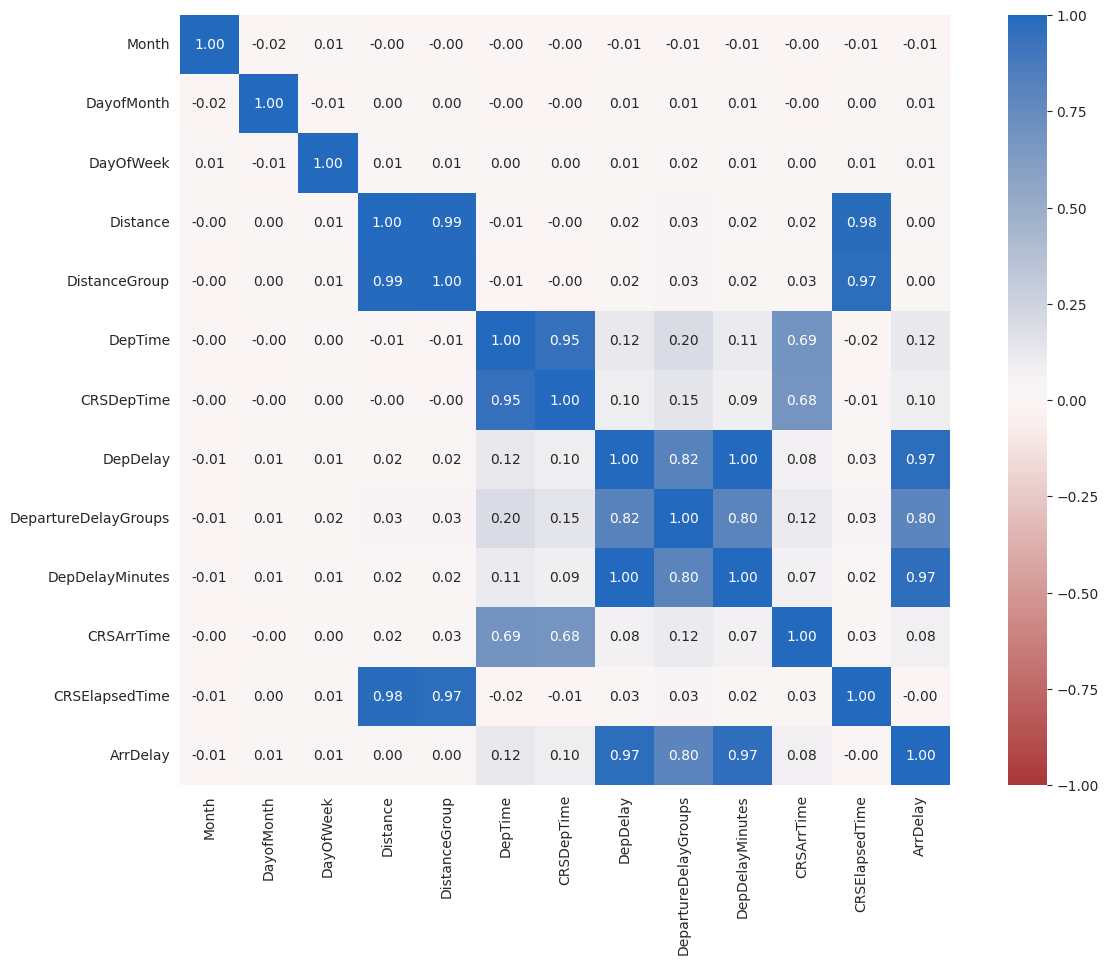

In [ ]:
# The code calculates the correlation matrix of a DataFrame, creates a heatmap plot using seaborn library to visualize the correlation matrix with annotations and color map.
corrmat = arrDelay_df.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmin=-1, square=True, annot=True, fmt='.2f', cmap='vlag_r', center=0);

We have chosen Arrival Delay as our Target Variable

In [ ]:
# target variable
y = np.array(arrDelay_df['ArrDelay'])

Features realted to Departure time, and schedule time along with features related to Month and Day were chosen for model training

In [ ]:
# model features
X = np.array(arrDelay_df[['Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 'DepartureDelayGroups', 'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime']])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Linear Regression Model**

Mean Squared Error:  [175.43472297213174, 173.4972370417706, 177.1688032128153, 173.1945318538435]
Root Mean Squared Error:  [13.245177347704022, 13.1718349914418, 13.310477197035999, 13.160339351773704]
Mean Absolute Error:  [9.182768587618803, 9.19033575364459, 9.266834729159546, 9.14926567189908]
R-squared:  [0.9414617496529051, 0.9492194084576552, 0.94546133139624, 0.9310772154497304]
Mean of Mean Squared Error:  174.82382377014028
Mean of Root Mean Squared Error:  13.22195722198888
Mean of Mean Absolute Error:  9.197301185580505
Mean of R-squared:  0.9418049262391326


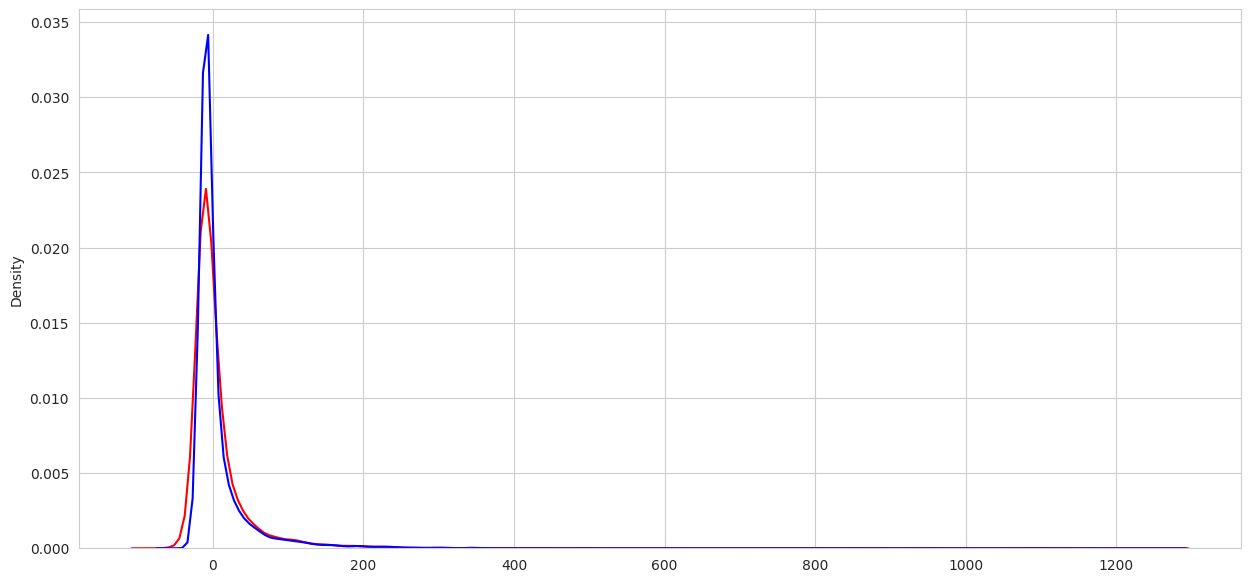

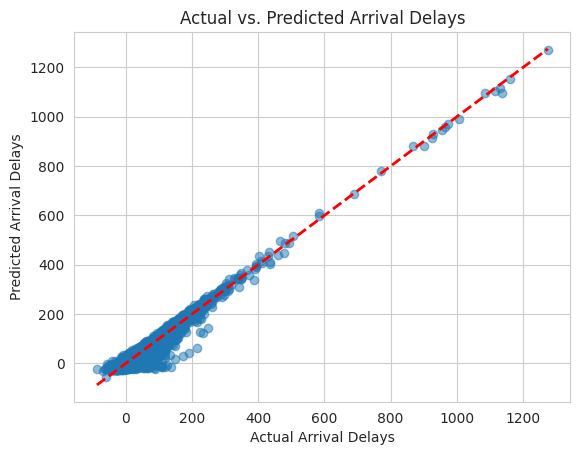

In [ ]:
pred_mse = []
pred_rmse = []
pred_mae = []
pred_r2 = []
for i in range(1,5):
  sampled_df = arrDelay_df.sample(n=100000)
  X = np.array(sampled_df[['Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 'DepartureDelayGroups', 'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime']])
  y = np.array(sampled_df['ArrDelay'])
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  # Create the linear regression model and fit it to the training data
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Evaluating the model on the below 4 statistics
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  pred_mse.append(mse)
  pred_rmse.append(rmse)
  pred_mae.append(mae)
  pred_r2.append(r2)

print("Mean Squared Error: ", pred_mse)
print("Root Mean Squared Error: ", pred_rmse)
print("Mean Absolute Error: ", pred_mae)
print("R-squared: ", pred_r2)

print("Mean of Mean Squared Error: ", np.mean(pred_mse))
print("Mean of Root Mean Squared Error: ", np.mean(pred_rmse))
print("Mean of Mean Absolute Error: ", np.mean(pred_mae))
print("Mean of R-squared: ", np.mean(pred_r2))


# The code creates a plot using seaborn library to visualize the distribution of actual and predicted values of a regression model, where y_test and y_pred are the actual and predicted values, respectively.
plt.figure(figsize=(15,7))
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Values')
sns.distplot(y_pred, hist=False, color='b', label='Fitted Values', ax=ax1)
plt.show()

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Arrival Delays")
plt.ylabel("Predicted Arrival Delays")
plt.title("Actual vs. Predicted Arrival Delays")

# This code plots a diagonal line on a scatter plot of the true values (y_test) against the predicted values (y_pred),
#which is a useful way to visualize how well the model's predictions match the true values
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', lw=2)

plt.show()


# **Decision Tree**

Mean Squared Error:  [388.6038, 373.6078, 361.07, 374.7507]
Root Mean Squared Error:  [19.713036295811968, 19.32893685643367, 19.001842015973082, 19.358478762547435]
Mean Absolute Error:  [13.6254, 13.514, 13.4657, 13.6496]
R-squared:  [0.8643323903613311, 0.8776912519898908, 0.8729774475407885, 0.8660454716255402]
Mean of Mean Squared Error:  374.508075
Mean of Root Mean Squared Error:  19.350573482691537
Mean of Mean Absolute Error:  13.563675
Mean of R-squared:  0.8702616403793877


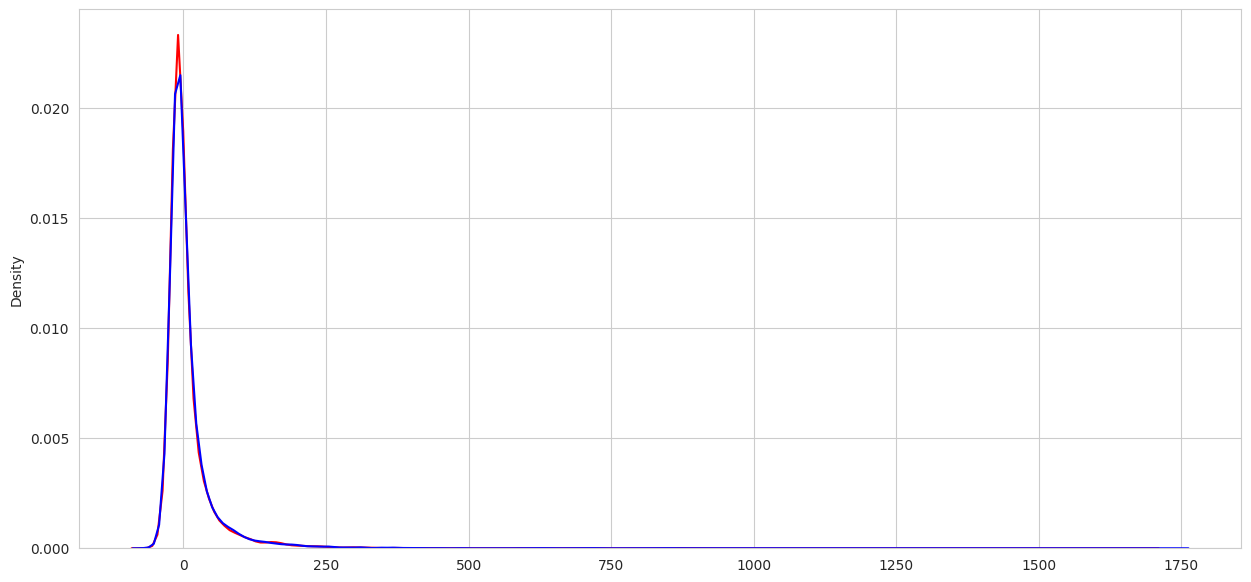

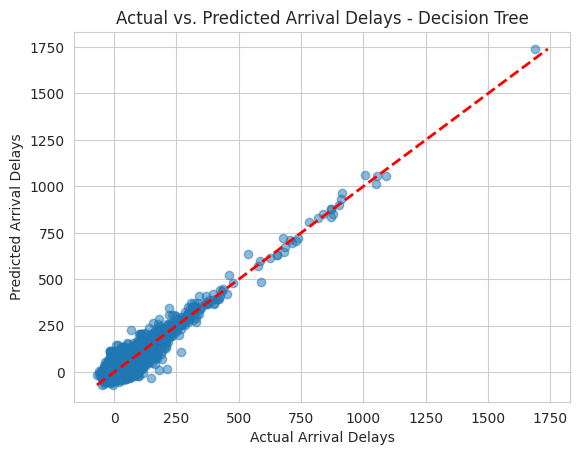

In [ ]:
pred_mse = []
pred_rmse = []
pred_mae = []
pred_r2 = []

for i in range(1,5):
  sampled_df = arrDelay_df.sample(n=100000)
  X = np.array(sampled_df[['Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 'DepartureDelayGroups', 'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime']])
  y = np.array(sampled_df['ArrDelay'])
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Create the linear regression model and fit it to the training data
  model = DecisionTreeRegressor(random_state=42)
  model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Evaluating the model on the below 4 statistics
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  pred_mse.append(mse)
  pred_rmse.append(rmse)
  pred_mae.append(mae)
  pred_r2.append(r2)

print("Mean Squared Error: ", pred_mse)
print("Root Mean Squared Error: ", pred_rmse)
print("Mean Absolute Error: ", pred_mae)
print("R-squared: ", pred_r2)

print("Mean of Mean Squared Error: ", np.mean(pred_mse))
print("Mean of Root Mean Squared Error: ", np.mean(pred_rmse))
print("Mean of Mean Absolute Error: ", np.mean(pred_mae))
print("Mean of R-squared: ", np.mean(pred_r2))

# The code creates a plot using seaborn library to visualize the distribution of actual and predicted values of a regression model, where y_test and y_pred are the actual and predicted values, respectively.
plt.figure(figsize=(15,7))
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Values')
sns.distplot(y_pred, hist=False, color='b', label='Fitted Values', ax=ax1)
plt.show()

# The below plot shows a Scatter plot of actual vs. predicted values of arrival delays
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Arrival Delays")
plt.ylabel("Predicted Arrival Delays")
plt.title("Actual vs. Predicted Arrival Delays - Decision Tree")

# Add a diagonal line to represent perfect predictions
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', lw=2)

plt.show()

# **XGBoost**

Mean Squared Error:  [184.35188379347474, 174.76372387430962, 178.29338168191967, 195.4243012446727]
Root Mean Squared Error:  [13.577624379598765, 13.219823140810531, 13.35265448073602, 13.979424210055031]
Mean Absolute Error:  [9.20648829348227, 9.201146770921012, 9.188630164427554, 9.248728340414749]
R-squared:  [0.9519380541147257, 0.9336649255671267, 0.9429928332825748, 0.9461099164925282]
Mean of Mean Squared Error:  183.2083226485942
Mean of Root Mean Squared Error:  13.532381552800086
Mean of Mean Absolute Error:  9.211248392311395
Mean of R-squared:  0.9436764323642388


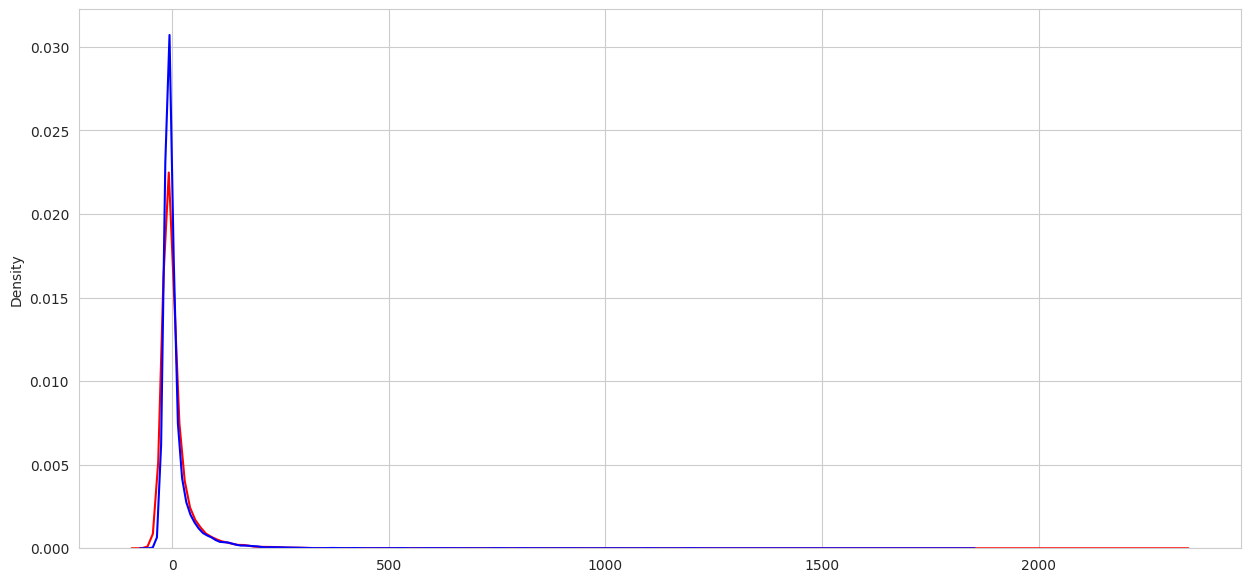

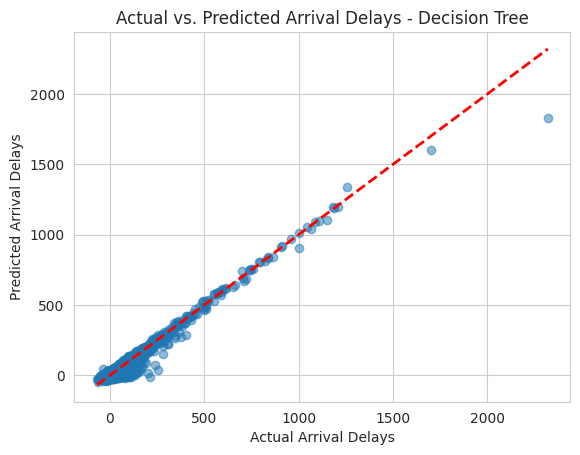

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

pred_mse = []
pred_rmse = []
pred_mae = []
pred_r2 = []

for i in range(1,5):
  sampled_df = arrDelay_df.sample(n=100000)
  X = np.array(sampled_df[['Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 'DepartureDelayGroups', 'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime']])
  y = np.array(sampled_df['ArrDelay'])
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Create the XGBoost model and fit it to the training data
  model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
  model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Evaluate the model
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  pred_mse.append(mse)
  pred_rmse.append(rmse)
  pred_mae.append(mae)
  pred_r2.append(r2)


print("Mean Squared Error: ", pred_mse)
print("Root Mean Squared Error: ", pred_rmse)
print("Mean Absolute Error: ", pred_mae)
print("R-squared: ", pred_r2)

print("Mean of Mean Squared Error: ", np.mean(pred_mse))
print("Mean of Root Mean Squared Error: ", np.mean(pred_rmse))
print("Mean of Mean Absolute Error: ", np.mean(pred_mae))
print("Mean of R-squared: ", np.mean(pred_r2))

# The code creates a plot using seaborn library to visualize the distribution of actual and predicted values of a regression model, where y_test and y_pred are the actual and predicted values, respectively.
plt.figure(figsize=(15,7))
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Values')
sns.distplot(y_pred, hist=False, color='b', label='Fitted Values', ax=ax1)
plt.show()

# The below plot shows a Scatter plot of actual vs. predicted values of arrival delays
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Arrival Delays")
plt.ylabel("Predicted Arrival Delays")
plt.title("Actual vs. Predicted Arrival Delays - Decision Tree")

# Add a diagonal line to represent perfect predictions
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', lw=2)

plt.show()

# **Random Forest**

Mean Squared Error:  [192.12777248499998, 208.62587174499998, 192.26792103500003, 187.428616495]
Root Mean Squared Error:  [13.861016286153045, 14.443887002638867, 13.866070857852993, 13.690457132433526]
Mean Absolute Error:  [9.6219585, 9.6149965, 9.590061500000001, 9.546521499999999]
R-squared:  [0.9433324260657537, 0.936077020378713, 0.9390012310127925, 0.9352537772242606]
Mean of Mean Squared Error:  195.11254544
Mean of Root Mean Squared Error:  13.965357819769608
Mean of Mean Absolute Error:  9.5933845
Mean of R-squared:  0.9384161136703799


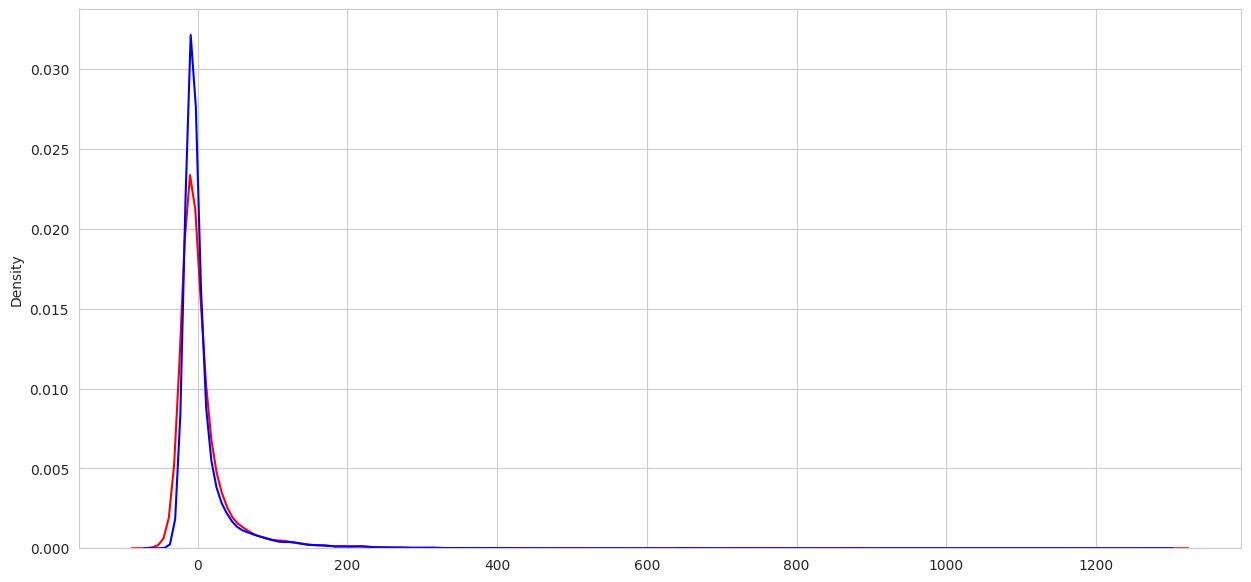

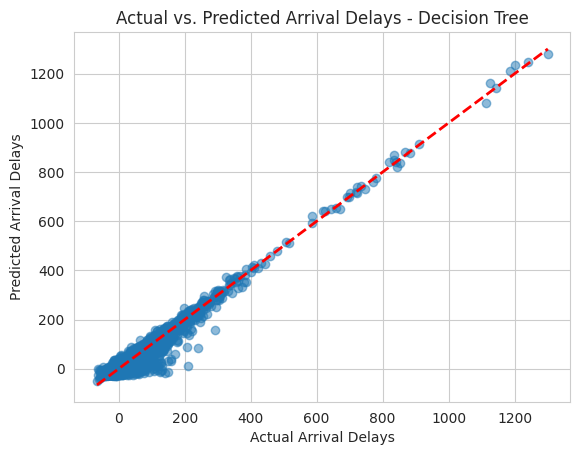

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

pred_mse = []
pred_rmse = []
pred_mae = []
pred_r2 = []

for i in range(1,5):
  sampled_df = arrDelay_df.sample(n=100000)

  X = np.array(sampled_df[['Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 'DepartureDelayGroups', 'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime']])
  y = np.array(sampled_df['ArrDelay'])
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Create the random forest model and fit it to the training data
  model = RandomForestRegressor(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Evaluate the model
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  pred_mse.append(mse)
  pred_rmse.append(rmse)
  pred_mae.append(mae)
  pred_r2.append(r2)


print("Mean Squared Error: ", pred_mse)
print("Root Mean Squared Error: ", pred_rmse)
print("Mean Absolute Error: ", pred_mae)
print("R-squared: ", pred_r2)

print("Mean of Mean Squared Error: ", np.mean(pred_mse))
print("Mean of Root Mean Squared Error: ", np.mean(pred_rmse))
print("Mean of Mean Absolute Error: ", np.mean(pred_mae))
print("Mean of R-squared: ", np.mean(pred_r2))

# The code creates a plot using seaborn library to visualize the distribution of actual and predicted values of a regression model, where y_test and y_pred are the actual and predicted values, respectively.
plt.figure(figsize=(15,7))
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Values')
sns.distplot(y_pred, hist=False, color='b', label='Fitted Values', ax=ax1)
plt.show()

# The below plot shows a Scatter plot of actual vs. predicted values of arrival delays
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Arrival Delays")
plt.ylabel("Predicted Arrival Delays")
plt.title("Actual vs. Predicted Arrival Delays - Decision Tree")

# Add a diagonal line to represent perfect predictions
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', lw=2)

plt.show()